<a href="https://colab.research.google.com/github/Jaesu26/korean-aspect-based-sentiment-analysis/blob/main/2022-11-06-%EC%86%8D%EC%84%B1%EA%B8%B0%EB%B0%98-%EA%B0%90%EC%84%B1-%EB%B6%84%EB%A5%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2022 Íµ≠Î¶ΩÍµ≠Ïñ¥Ïõê Ïù∏Í≥µÏßÄÎä• Ïñ∏Ïñ¥Îä•Î†•ÌèâÍ∞Ä

In [1]:
!nvidia-smi

Sun Nov  6 11:51:41 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   43C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 4 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 2s (5,306 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype

In [2]:
!pip install openpyxl
!pip install soynlp
!pip install emoji
!pip install transformers==4.8.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 416 kB 33.7 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 240 kB 33.5 MB/s 
  Created wheel for emoji: filename=emoji-2.2.0-py3-none-any.whl size=234927 sha256=08dfac64499e9b4619001b94de2f06a27300f7d4f984cb20635ab3e39df86a37
  Stored in directory: /root/.cache/pip/wheels/f3/e3/f2/1de1c2e3ed742e1df73e0f15d58864e50c7e64f607b548d6cf
Successfully built emoji
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚

`-` Îü∞ÌÉÄÏûÑ Ïû¨ÏãúÏûë

## Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import random
import json
import os
import gc
import re
import emoji

from soynlp.normalizer import repeat_normalize

from sklearn.preprocessing import LabelEncoder, MultiLabelBinarizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from typing import Any, Callable, Dict, List, Optional, Sequence, Tuple, Union
from numpy.typing import NDArray

from tqdm.auto import tqdm
from glob import glob

warnings.filterwarnings('ignore') 

In [4]:
from google.colab import drive

drive.mount('/content/drive')  ## Íµ¨Í∏ÄÏΩîÎû©Í≥º Íµ¨Í∏ÄÎìúÎùºÏù¥Î∏å Ïó∞Í≤∞

Mounted at /content/drive


In [5]:
%cd  '/content/drive/MyDrive/Colab Notebooks/ÏÜçÏÑ±Í∏∞Î∞ò-Í∞êÏÑ±-Î∂ÑÎ•ò'

/content/drive/MyDrive/Colab Notebooks/ÏÜçÏÑ±Í∏∞Î∞ò-Í∞êÏÑ±-Î∂ÑÎ•ò


- Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞

In [6]:
JsonType = Dict[str, Any]

In [7]:
train_path = './data/nikluge-sa-2022-train.jsonl'
valid_path = './data/nikluge-sa-2022-dev.jsonl'
test_path = './data/nikluge-sa-2022-test.jsonl'
submission_path = './data/nikluge-sa-2022-submission11.json'

In [8]:
def load_jsonl(file_path: str) -> List[JsonType]:
    """jsonl ÌååÏùºÏùÑ ÏùΩÏñ¥ÏÑú listÏóê Ï†ÄÏû•"""
    json_list = []
    with open(file_path, encoding='utf-8') as f:
        for line in f.readlines():
            json_list.append(json.loads(line))
    return json_list

In [9]:
def write_jsonl(jsonl: List[JsonType], file_path: str) -> None:
    """jsonl ÌååÏùºÏùÑ write"""
    with open(file_path, mode='w', encoding='utf-8') as f: 
        for j in jsonl: 
            f.write(json.dumps(j, ensure_ascii=False) + '\n')

In [10]:
def jsonl2df(jsonl: List[JsonType]) -> pd.DataFrame:
    """
    jsonlÏùÑ dataframeÏúºÎ°ú Î≥ÄÍ≤ΩÌïú ÌõÑ Î∞òÌôò
    For entity property classification
    """
    ids = []
    texts = []
    entity_properties = []
    sentiments = []
    
    for json in jsonl:
        annotations = json['annotation']
        ids.append(json['id'].split('-')[-1])
        texts.append(json['sentence_form'])
        entity_properties.append([annotation[0] for annotation in annotations])
        sentiments.append([annotation[2] for annotation in annotations])
        
    df = pd.DataFrame({'id':ids,
                        'text':texts,
                        'entity_property':entity_properties,
                        'sentiment':sentiments})
    
    return df

In [11]:
def to_tidy(df: pd.DataFrame) -> pd.DataFrame:
    """
    entity_property Î≥ÄÏàòÍ∞Ä Ìïú ÌñâÏóê ÌïòÎÇòÏùò Í∞úÏ≤¥ ÏÜçÏÑ±Îßå Í∞ÄÏßÄÎèÑÎ°ù Î≥ÄÌôò
    For visualization and sentiment classification
    """
    list_df = df.to_numpy().tolist()
    ids = []
    texts = []
    entity_properties = []
    sentiments = []

    for id, text, entity_property, sentiment in list_df:
        if not entity_property:
            entity_property = [[]]
        if not sentiment:
            sentiment = [[] for _ in range(len(entity_property))]

        for e, s, in zip(entity_property, sentiment):
            ids.append(id)
            texts.append(text)
            entity_properties.append(e)
            sentiments.append(s) 

    df = pd.DataFrame({'id':ids,
                       'text':texts,
                       'entity_property':entity_properties,
                       'sentiment':sentiments})
    return df

In [12]:
def to_untidy(df: pd.DataFrame) -> pd.DataFrame:
    ids = []
    texts = []
    entity_properties = [] 
    sentiments = [] 

    for id in sorted(df['id'].unique()):
        tmp = df.query('id == @id')
        ids.append(id)
        texts.append(tmp['text'].values[0])
        if isinstance(tmp['entity_property'].tolist()[0], list):  ## [[]] 
            entity_properties.append(tmp['entity_property'].tolist()[0])
            sentiments.append(tmp['sentiment'].tolist()[0])
        else:
            entity_properties.append(tmp['entity_property'].tolist())
            sentiments.append(tmp['sentiment'].tolist())

    df = pd.DataFrame({'id':ids,
                       'text':texts,
                       'entity_property':entity_properties,
                       'sentiment':sentiments})
    return df

In [13]:
def replace(string, mapping):
    for k, v in mapping.items():
        string = string.replace(k, f'@{v}')
    return string

In [14]:
mapping_entity = {
    'Î≥∏Ìíà#ÌíàÏßà':'q',
    'Ï†úÌíà Ï†ÑÏ≤¥#ÏùºÎ∞ò':'1',
    'Î≥∏Ìíà#ÏùºÎ∞ò':'2',
    'Ï†úÌíà Ï†ÑÏ≤¥#ÌíàÏßà':'3',
    'Ï†úÌíà Ï†ÑÏ≤¥#ÎîîÏûêÏù∏':'4',
    'Ï†úÌíà Ï†ÑÏ≤¥#Ìé∏ÏùòÏÑ±':'5',
    'Î≥∏Ìíà#Ìé∏ÏùòÏÑ±':'6',
    'Ï†úÌíà Ï†ÑÏ≤¥#Ïù∏ÏßÄÎèÑ':'7',
    'Î∏åÎûúÎìú#ÏùºÎ∞ò':'8',
    'Ìå®ÌÇ§ÏßÄ/Íµ¨ÏÑ±Ìíà#ÎîîÏûêÏù∏':'9',
    'Ï†úÌíà Ï†ÑÏ≤¥#Í∞ÄÍ≤©':'a',
    'Ìå®ÌÇ§ÏßÄ/Íµ¨ÏÑ±Ìíà#Ìé∏ÏùòÏÑ±':'b',
    'Ìå®ÌÇ§ÏßÄ/Íµ¨ÏÑ±Ìíà#ÏùºÎ∞ò':'c',
    'Î≥∏Ìíà#Îã§ÏñëÏÑ±':'d',
    'Î≥∏Ìíà#ÎîîÏûêÏù∏':'e',
    'Î∏åÎûúÎìú#ÌíàÏßà':'f',
    'Ìå®ÌÇ§ÏßÄ/Íµ¨ÏÑ±Ìíà#ÌíàÏßà':'g',
    'Î∏åÎûúÎìú#Ïù∏ÏßÄÎèÑ':'h',
    'Î∏åÎûúÎìú#Í∞ÄÍ≤©':'i',
    'Î≥∏Ìíà#Í∞ÄÍ≤©':'j',
    'Ìå®ÌÇ§ÏßÄ/Íµ¨ÏÑ±Ìíà#Îã§ÏñëÏÑ±':'k',
    'Î≥∏Ìíà#Ïù∏ÏßÄÎèÑ':'l',
    'Î∏åÎûúÎìú#ÎîîÏûêÏù∏':'m',
}

mapping_sentiment = {
    'positive':'1',
    'negative':'2',
    'neutral':'3',
}

In [15]:
mapping_entity = {v:k for k, v in mapping_entity.items()}
mapping_sentiment = {v:k for k, v in mapping_sentiment.items()}

In [16]:
df = jsonl2df(load_jsonl(train_path))

valid = jsonl2df(load_jsonl(valid_path))
tidy_valid = to_tidy(valid)

test = jsonl2df(load_jsonl(test_path))

In [17]:
df = df.query('id != "02997" and id != "02953"').reset_index().drop('index', axis=1)  ## miss labeling

In [18]:
## ÏóÖÎç∞Ïù¥Ìä∏ Ìï¥Ïïº Îê®
df2 = pd.read_excel('./data/sentiment_dataset.xlsx', engine='openpyxl')
df3 = pd.read_excel('./data/naver_shopping.xlsx', engine='openpyxl')

In [19]:
df2 = df2.drop_duplicates().dropna().reset_index().drop('index', axis=1)
df3 = df3.drop_duplicates().dropna().reset_index().drop('index', axis=1)

In [20]:
df2['entity_property'] =  df2['entity_property'].astype(str)
df2['sentiment'] =  df2['sentiment'].astype(float).astype(int).astype(str)

df3['entity_property'] =  df3['entity_property'].astype(str)
df3['sentiment'] =  df3['sentiment'].astype(float).astype(int).astype(str)

In [21]:
## ÏûòÎ™ª Í∏∞ÏûÖÎêú Îç∞Ïù¥ÌÑ∞Í∞Ä ÏûàÎäîÏßÄ ÌôïÏù∏ (ÏÜçÏÑ± Í∞úÏ≤¥ÏôÄ Í∑πÏÑ±ÏùÄ ÏùºÎåÄÏùº ÎåÄÏùëÍ¥ÄÍ≥ÑÏó¨Ïïº Ìï®)
(df2['entity_property'].str.len() != df2['sentiment'].str.len()).any(),\
(df3['entity_property'].str.len() != df3['sentiment'].str.len()).any()

(False, False)

In [22]:
df2['entity_property'] = df2['entity_property'].apply(lambda x: replace(x, mapping_entity)[1:].split('@'))
df2['sentiment'] = df2['sentiment'].apply(lambda x: replace(x, mapping_sentiment)[1:].split('@'))

df3['entity_property'] = df3['entity_property'].apply(lambda x: replace(x, mapping_entity)[1:].split('@'))
df3['sentiment'] = df3['sentiment'].apply(lambda x: replace(x, mapping_sentiment)[1:].split('@'))

In [23]:
df2['id'] = [str(id).zfill(5) for id in range(df.shape[0]+1, df.shape[0]+df2.shape[0]+1)]
df3['id'] = [str(id).zfill(5) for id in range(df.shape[0]+df2.shape[0]+1, df.shape[0]+df2.shape[0]+df3.shape[0]+1)]

In [24]:
df2 = df2[['id', 'text', 'entity_property', 'sentiment']]
df3 = df3[['id', 'text', 'entity_property', 'sentiment']]

In [25]:
df = pd.concat([df, df2, df3], axis=0).reset_index().drop('index', axis=1)

In [26]:
tidy_df = to_tidy(df)

In [27]:
tidy_df = tidy_df.drop_duplicates().reset_index().drop('index', axis=1)  ## Ï£ºÏÑùÎêòÎäî ÏöîÏù∏Îßå Îã§Î•∏ Í≤ΩÏö∞
tidy_valid = tidy_valid.drop_duplicates().reset_index().drop('index', axis=1)

In [37]:
minor_entity_columns = list(tidy_df['entity_property'].value_counts().to_dict().keys())[-5:]  ## minor classes
minor_entity_ids = tidy_df.query('entity_property == @minor_entity_columns')['id'].to_numpy().tolist()
df = df.query('id not in @minor_entity_ids').reset_index().drop('index', axis=1)
tidy_df = tidy_df.query('id not in @minor_entity_ids').reset_index().drop('index', axis=1)

In [38]:
tidy_df.head() 

id                                               text entity_property  \
0  00001             ÎëòÏ®ãÎÇ†ÏùÄ ÎØ∏ÏπúÎìØÏù¥ Î∞üÏïÑÎ¥§ÎçîÎãà Í∏∞Ïñ¥Í∞Ä ÌóõÎèåÎ©¥ÏÑú Ìã±Ìã± ÏÜåÎ¶¨Í∞Ä ÎÇòÏÑú Í≤ΩÏïÖ.           Î≥∏Ìíà#ÌíàÏßà   
1  00002  Ïù¥Í±∞ Î≠ê ÏÇêÍæ∏Î•º Ï§Ä Í±∞ ÏïÑÎÉê Î∂àÏïàÌïòÍ≥†, Í±∞Í∏à Ìà¨ÏûêÌïú Í≤å Ïôú Ïù¥Îûò.. Ïã∂Ïñ¥ÏÑú Ï†ïÏù¥ Ìôï...           Î≥∏Ìíà#ÌíàÏßà   
2  00003               Í∞ÑÏÇ¨ÌïòÍ≤åÎèÑ Í∑∏ Ïù¥ÌõÑÏóêÎäî ÎùºÏù¥Îî©Ïù¥ ÏïÑÏ£º Ï¶êÍ±∞ÏõåÏ†∏ÏÑú ÎßåÏ°±Ïä§ÎüΩÍ≤å ÌÉîÎã§.        Ï†úÌíà Ï†ÑÏ≤¥#ÏùºÎ∞ò   
3  00004  ÏÉ•Ïù¥ ÏóÜÎäî Î™®Îç∏Ïù¥Îùº ÏùºÎ∞ò ÎèÑÎ°úÏóêÏÑú ÌÉÄÎ©¥ ÎÖ∏Î©¥Ïùò ÏßÑÎèô ÎïåÎ¨∏Ïóê ÏÜêÎ™©Ïù¥ ÎçúÎçúÎçú Îñ®Î¶¨Í≥† Ïù¥...        Ï†úÌíà Ï†ÑÏ≤¥#ÏùºÎ∞ò   
4  00005                     ÏïàÏû•ÎèÑ Îî±Îî±Ìï¥ÏÑú ÏóâÎç©Ïù¥Í∞Ä ÏïÑÌå†ÎäîÎç∞ Î¨¥ÏãúÌïòÍ≥† ÌÉÄÍ≥† ÏûàÎã§.           Î≥∏Ìíà#ÏùºÎ∞ò   

  sentiment  
0  negative  
1  negative  
2  positive  
3   neutral  
4  negative

In [39]:
df.shape, tidy_df.shape

((4279, 4), (5150, 4))

- ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ (Í∞úÏ≤¥ ÏÜçÏÑ±Í≥º Í∞êÏÑ±)

In [98]:
MODEL_PATHS = {'bert':'kykim/bert-kor-base',
               'electra':'kykim/electra-kor-base',}

MODEL_NAME = 'bert'
MODEL_DEFAULT_WEIGHT_PATHS = {'ACD':f'acd_{MODEL_NAME}_default_weight.pt', 
                              'ASC':f'asc_{MODEL_NAME}_default_weight.pt'} 

SAVE_PATHS = {'ACD':'./acd_teacher_weight',
              'ASC':'./asc_teacher_weight'}

SAVE_PATHS2 = {'ACD':'./acd_student_weight',
              'ASC':'./asc_student_weight'}

NUM_CLASSES = {'ACD':len(tidy_df['entity_property'].unique()),   
               'ASC':len(tidy_df['sentiment'].unique())}

NUM_EPOCHS = {'ACD':40, 'ASC':7}
MAX_LEN = 47
BATCH_SIZE = 64
LEARNING_RATE = {'ACD':5e-5, 'ASC':7e-6}
LABEL_SMOOTHING = 0.05
SEEDS = [2021, 22, 1]  ## seed ensemble
NUM_FOLDS = len(SEEDS) 

- Í∞ÄÏ§ëÏπò Ï†ÄÏû•Ìè¥Îçî

In [41]:
def create_folder(path: str) -> None:
    try:
        if not os.path.exists(path):
            os.makedirs(path)
    except OSError as error:
        print(error)

In [42]:
create_folder(SAVE_PATHS['ACD'])
create_folder(SAVE_PATHS['ASC'])

## ÏãúÍ∞ÅÌôî

### ÎùºÎ≤®

In [ ]:
plt.rc('font', family='NanumBarunGothic')

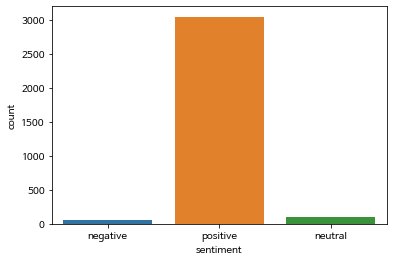

In [ ]:
sns.countplot(tidy_df['sentiment'])

`-` ÎùºÎ≤® Î∂àÍ∑†ÌòïÏù¥ Îß§Ïö∞ Ïã¨ÌïòÎã§

`-` ÌïòÏßÄÎßå ÌèâÍ∞Ä ÏÇ∞ÏãùÏùÄ Îã®ÏàúÌûà ÎùºÎ≤®ÏùÑ ÎßûÏ∑ÑÎÉê Î™ªÎßûÏ∑ÑÎÉêÎ°úÎßå ÌåêÎã®ÌïúÎã§

`-` Ï¶â, Îã®Ïàú `f1 score`Ïù¥ÎØÄÎ°ú Ï†ÅÏùÄ ÌÅ¥ÎûòÏä§Ïùò Ïπ¥ÌÖåÍ≥†Î¶¨Îäî ÎÇ¥Îã§ Î≤ÑÎ†§ÎèÑ Ï¢ãÏùÄ Ï†êÏàòÎ•º ÏñªÏùÑ Ïàò ÏûàÎã§

`-` ÏÜçÏÑ± Í∏∞Î∞ò Í∞êÏÑ± Î∂ÑÎ•òÏù∏Îç∞ Í∞êÏÑ± ÎåÄÎ∂ÄÎ∂ÑÏù¥ Í∏çÏ†ïÏù¥ÎØÄÎ°ú ÏÇ¨Ïã§ÏÉÅ ÏÜçÏÑ± Î∂ÑÎ•ò ÌÖåÏä§ÌÅ¨ÏôÄ Í∞ôÎã§

`-` Í∑∏Îü∞Îç∞ trainÍ≥º testÏùò Î∂ÑÌè¨Í∞Ä Îã§Î•¥Îã§Î©¥?......

`-` Î¨¥ÏûëÏúÑÎ°ú ÏÉòÌîåÎßÅÌñàÎã§Î©¥ ÎëòÏùò Î∂ÑÌè¨Í∞Ä ÎπÑÏä∑Ìï† Í≤ÉÏù¥Îã§

### Í∞úÏ≤¥ ÏÜçÏÑ±

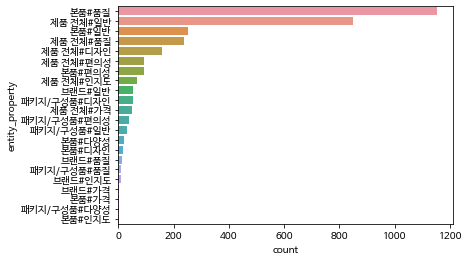

In [ ]:
sns.countplot(y=tidy_df['entity_property'], order=tidy_df['entity_property'].value_counts().index) 

`-` Í∞úÏ≤¥ ÏÜçÏÑ±ÎèÑ Î∂àÍ∑†ÌòïÏù¥ Ïã¨ÌïòÎã§

`-` ÌïòÏßÄÎßå Îã®ÏàúÌûà ÎßûÏ∑ÑÎÉê Î™ªÎßûÏ∑ÑÎÉêÎ°ú ÌåêÎã®ÌïòÎØÄÎ°ú Ï†ÅÏùÄ ÌÅ¥ÎûòÏä§Îäî ÎÇ¥Îã§ Î≤ÑÎ†§ÎèÑ Ï¢ãÏùÄ Ï†êÏàòÎ•º ÏñªÏùÑ Ïàò ÏûàÎã§

### ÌÖçÏä§Ìä∏

In [ ]:
df['text'].str.len().describe()

count    3001.00000
mean       33.91103
std        20.15056
min         1.00000
25%        19.00000
50%        30.00000
75%        44.00000
max       161.00000
Name: text, dtype: float64

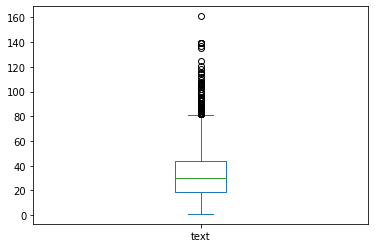

In [ ]:
df['text'].str.len().plot.box()

In [ ]:
def check_hashtag_df(texts: Sequence[str]) -> Dict[str, int]:
    """Ìï¥ÏãúÌÉúÍ∑∏Ïùò document frequencyÎ•º Í≥ÑÏÇ∞"""
    hashtag_dict = {}
    for text in texts:
        text = text.lower()
        words = text.split()
        duplicate = {}
        for word in words:
            if '#' in word and word not in duplicate:
                if word not in hashtag_dict:
                    hashtag_dict[word] = 1
                else:
                    hashtag_dict[word] += 1
                duplicate[word] = True

    hashtag_dict.update({'Í≥†Ïú†Ìïú Ìï¥ÏãúÌÉúÍ∑∏ Í∞úÏàò':len(hashtag_dict)})
    hashtag_dict = sorted(hashtag_dict.items(), key=lambda item: item[1], reverse=True)
    return hashtag_dict

In [ ]:
def check_emoji_df(texts: Sequence[str]) -> Dict[str, int]:
    """Ïù¥Î™®ÏßÄÏùò document frequencyÎ•º Í≥ÑÏÇ∞"""
    emoji_dict = {}
    for text in texts:
        text = text.lower()
        words = text.split()
        duplicate = {}
        for word in words:
            if emoji.is_emoji(word) and word not in duplicate:
                if word not in emoji_dict:
                    emoji_dict[word] = 1
                else:
                    emoji_dict[word] += 1
                duplicate[word] = True

    emoji_dict.update({'Í≥†Ïú†Ìïú Ïù¥Î™®ÏßÄ Í∞úÏàò':len(emoji_dict)})
    emoji_dict = sorted(emoji_dict.items(), key=lambda item: item[1], reverse=True)
    return emoji_dict

In [ ]:
def check_word_counts(word: str, texts: Sequence[str], labels: NDArray[np.str_]) -> Dict[str, int]:
    count_dict = {}
    for idx, text in enumerate(texts):
        text = text.lower()
        label = labels[idx]
        if word in text:   
            if label not in count_dict:
                count_dict[label] = 1
            else:
                count_dict[label] += 1

    all_counts = sum([np.sum(labels == key) for key in list(count_dict.keys())])
    count_dict.update({'Ìï©Í≥Ñ':sum(count_dict.values())})
    count_list = list(count_dict.items())
    count_list = list(map(list, count_list))

    for item in count_list:
        if item[0] == 'Ìï©Í≥Ñ':
            item.append(all_counts)
        else:
            item.append(np.sum(labels == item[0]))

    count_list = sorted(count_list, key=lambda item: (-item[1], -item[2]))
    return count_list

In [ ]:
check_word_counts('Ï†ëÏ∞©', tidy_valid['text'], tidy_valid['entity_property'])

[['Ìï©Í≥Ñ', 0, 0]]

In [ ]:
check_word_counts('Î∞ïÏä§', tidy_df['text'], tidy_df['entity_property'])

[['Ìï©Í≥Ñ', 0, 0]]

In [ ]:
# check_hashtag_df(df['text'].values)

In [ ]:
# check_emoji_df(df['text'].values)

In [ ]:
# set(df.text.apply(lambda x: re.sub(r'[ .,?!/@$&%~ÔºÖ#¬∑‚àº()0-9a-zA-Z„Ñ±-„Ö£Í∞Ä-Ìû£]+', '', x)).tolist())

`-` Ïù¥Î™®Ìã∞ÏΩòÏùÄ Î™®Îç∏Ïù¥ ÌïôÏäµÌïòÏßÄ Î™ªÌïòÎØÄÎ°ú Ïù¥Î™®Ìã∞ÏΩòÏùò ÏùòÎØ∏Î°ú Î∞îÍøîÏ£ºÏóàÎã§ (ÏÑ±Îä• Ìñ•ÏÉÅÏù¥ ÏûàÏùÑ Í≤É)

### ÌÖçÏä§Ìä∏ Í∏∏Ïù¥ÏôÄ ÌÜ†ÌÅ∞ Í∏∏Ïù¥

In [ ]:
import torch
from transformers import AutoTokenizer

In [ ]:
tokenizer = AutoTokenizer.from_pretrained(MODEL_PATHS[MODEL_NAME])  

Downloading:   0%|          | 0.00/56.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/468 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/214k [00:00<?, ?B/s]

- ÌÖçÏä§Ìä∏ Í∏∏Ïù¥

In [ ]:
train_texts = df['text'].values

In [ ]:
texts_len = list(map(len, train_texts))

25%:  19.0
50%:  30.0
75%:  43.0
85%:  52.0
90%:  59.0
95%:  71.0
99%:  96.0
99.9%:  135.0


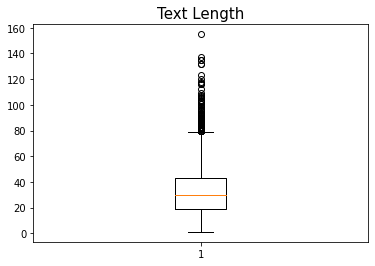

In [ ]:
plt.boxplot(texts_len)
print('25%: ', np.quantile(texts_len, q=0.25))
print('50%: ', np.quantile(texts_len, q=0.5))
print('75%: ', np.quantile(texts_len, q=0.75))
print('85%: ', np.quantile(texts_len, q=0.85))
print('90%: ', np.quantile(texts_len, q=0.9))
print('95%: ', np.quantile(texts_len, q=0.95))
print('99%: ', np.quantile(texts_len, q=0.99))
print('99.9%: ', np.quantile(texts_len, q=0.999))
plt.title('Text Length', fontsize=15)
plt.show()

- ÌÜ†ÌÅ∞ Í∏∏Ïù¥

In [ ]:
tokens_len = []
for text in tqdm(train_texts):
    inputs = tokenizer(
            text, 
            return_tensors='pt',
            truncation=True,
            max_length=100,
            pad_to_max_length=True,
            add_special_tokens=True
        )
    inputs = torch.sum(inputs['attention_mask'])
    tokens_len.append(inputs)

  0%|          | 0/3001 [00:00<?, ?it/s]

25%:  10.0
50%:  13.0
75%:  19.0
85%:  22.0
90%:  25.0
95%:  29.0
99%:  40.0
99.9%:  53.0


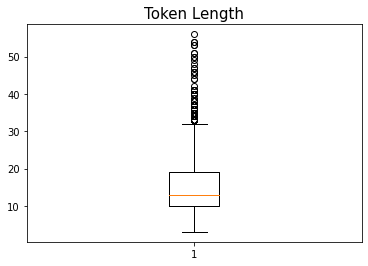

In [ ]:
plt.boxplot(tokens_len)
print('25%: ', np.quantile(tokens_len, q=0.25))
print('50%: ', np.quantile(tokens_len, q=0.5))
print('75%: ', np.quantile(tokens_len, q=0.75))
print('85%: ', np.quantile(tokens_len, q=0.85))
print('90%: ', np.quantile(tokens_len, q=0.9))
print('95%: ', np.quantile(tokens_len, q=0.95))
print('99%: ', np.quantile(tokens_len, q=0.99))
print('99.9%: ', np.quantile(tokens_len, q=0.999))
plt.title('Token Length', fontsize=15)
plt.show()

- ÏÇ∞Ï†êÎèÑ

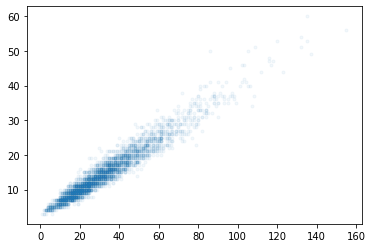

In [ ]:
plt.plot(texts_len, tokens_len, '.', alpha=0.05)

`-` $\text{ÌÜ†ÌÅ∞ Í∏∏Ïù¥} \times 2 \approx \text{ÌÖçÏä§Ìä∏ Í∏∏Ïù¥}$

## ÏäàÎèÑ ÎùºÎ≤®ÎßÅ

- Reference

Ïã†Í≤ΩÏãù(2019). Ïó∞Íµ¨Ïö© ÎπÖÎç∞Ïù¥ÌÑ∞ Î†àÌååÏßÄÌÜ†Î¶¨ [http://www.drbr.or.kr]. ÌïúÍµ≠Í≤ΩÏòÅÌïôÌöå.
Shin, K-s (2019). Data Repository for Business Research [http://www.drbr.or.kr]. The Korean Academic Society of Business Administration.

`-` ÌôîÏû•Ìíà ÏÉÅÌíàÌèâÏóê Ïã§Ï†ú Îì±Ïû•Ìïú aspect termÍ≥º aspect termÏùò ÏÉÅÏúÑÍ∞úÎÖêÏù∏ aspect category 20Í∞úÎ°ú Íµ¨ÏÑ±ÎêòÏñ¥ ÏûàÎã§

`-` polarityÎäî Í∞Å ÏÜçÏÑ±Ïóê ÎåÄÌïú Í∞êÏÑ±Ïù¥ positive ÎòêÎäî negativeÎ°ú Î∂ÑÎ•òÎêú Í≤ÉÏù¥Îã§.

`-` Ìï¥Îãπ Îç∞Ïù¥ÌÑ∞ÏÖãÏóêÏÑú 800Í∞úÏùò rowÎ•º ÏÇ¨Ïö© (ÎÑàÎ¨¥ ÎßéÏù¥ ÏÇ¨Ïö©ÌïòÎ©¥ ÌôîÏû•Ìíà ÏÉÅÌíàÌèâÏóêÎßå Ìé∏Ìñ•Îê®)

`-` https://github.com/bab2min/corpus/tree/master/sentiment

`-` ÏúÑÎäî ÏáºÌïëÎ™∞ Î¶¨Î∑∞ 20ÎßåÍ∞ú Îç∞Ïù¥ÌÑ∞Ïù¥Îã§ (Í∏çÏ†ï Î∂ÄÏ†ï Î∞òÎ∞ò)

`-` Ìï¥Îãπ Îç∞Ïù¥ÌÑ∞ÏÖãÏóêÏÑú Í∞ÄÎä•ÌïúÎßåÌÅº ÎùºÎ≤®ÎßÅÏùÑ Ìï¥ÏÑú ÏÇ¨Ïö©

`-` Ïï†Îß§Ìïú ÌÖçÏä§Ìä∏Îäî Í±¥ÎÑàÎõ∞ÏóàÎã§

`-` ÎÇòÎ®∏ÏßÄ Îç∞Ïù¥ÌÑ∞Îäî ÏäàÎèÑ ÎùºÎ≤®ÎßÅÏúºÎ°ú ÏÇ¨Ïö©

- labeling

`-` Ìï¥Îãπ Îç∞Ïù¥ÌÑ∞ÏÖãÏùò aspect categoryÎ•º Ìï¥Í≤∞ÌïòÍ≥†Ïûê ÌïòÎäî Ïó∞Íµ¨ Î¨∏Ï†úÏùò ÏÜçÏÑ± Í∞úÏ≤¥Î°ú Î∞îÎ°ú Îß§ÌïëÌï† Ïàò ÏóÜÎã§

`-` ÏòàÏª®ÎåÄ aspect categoryÍ∞Ä `ÏÉâÏÉÅ`Ïù¥Îùº ÌïòÎçîÎùºÎèÑ `Ï†úÌíà Ï†ÑÏ≤¥#ÎîîÏûêÏù∏`Ïù∏ÏßÄ `Î≥∏Ìíà#ÎîîÏûêÏù∏`Ïù∏ÏßÄ `Ìå®ÌÇ§ÏßÄ/Íµ¨ÏÑ±Ìíà#ÎîîÏûêÏù∏`Ïù∏ÏßÄ Î™®Î•¥Í∏∞ ÎïåÎ¨∏Ïù¥Îã§

`-` Ïù¥Îäî Îã§Î•∏ aspect categoryÎèÑ ÎßàÏ∞¨Í∞ÄÏßÄÏù¥Îã§

`-` ÎòêÌïú Ìï¥Îãπ Îç∞Ïù¥ÌÑ∞ÏÖãÏùÄ ÌïòÎÇòÏùò aspect categoryÏóê ÌïòÎÇòÏùò polarityÎßå Í∞ÄÏßÄÍ≥† ÏûàÏßÄÎßå Îëê Í∞ú Ïù¥ÏÉÅÏùò aspect categoryÎ•º Ïñ∏Í∏âÌïòÍ≥† ÏûàÎäî ÌÖçÏä§Ìä∏Î•º Ïã¨Ïã¨Ïπò ÏïäÍ≤å Î≥º Ïàò ÏûàÎã§

`-` Í∑∏Î¶¨ÌïòÏó¨ Ïó∞Íµ¨ Î¨∏Ï†úÏóêÏÑú Ï£ºÏñ¥ÏßÑ Îç∞Ïù¥ÌÑ∞ÏÖãÏùÑ ÌïôÏäµÌïú Î™®Îç∏Î°ú Ìï¥Îãπ Îç∞Ïù¥ÌÑ∞ÏÖãÏùò ÏÜçÏÑ± Í∞úÏ≤¥ÏôÄ Í∑πÏÑ±ÏùÑ ÏòàÏ∏°Ìïú ÌõÑ Ìï¥Îãπ ÏòàÏ∏°Í∞íÏùÑ ÎùºÎ≤®Î°ú ÏÇ¨Ïö©ÌïòÍ∏∞Î°ú ÌïòÍ≤†Îã§

`-` Îã®, Î™®Îç∏Ïùò Î∂ÑÎ•ò Îä•Î†•Ïù¥ ÏôÑÎ≤ΩÌïú Í≤ÉÏù¥ ÏïÑÎãàÍ∏∞Ïóê ÏûòÎ™ª ÎùºÎ≤®ÎßÅÎêú Îç∞Ïù¥ÌÑ∞Í∞Ä ÌïÑÏó∞Ï†ÅÏúºÎ°ú Ï°¥Ïû¨Ìï† Ïàò Î∞ñÏóê ÏóÜÎäî Îã®Ï†êÏù¥ ÏûàÎã§

`-` Î∂ÑÎ•ò ÏÑ±Îä•ÏùÑ Ìñ•ÏÉÅÏãúÌÇ§Í∏∞ ÏúÑÌï¥ Ìï¥Îãπ Îç∞Ïù¥ÌÑ∞ÏÖãÏóêÏÑú Ï†ïÏùòÎêú aspect categoryÎ•º ÏÇ¨Ïö©ÌïòÍ≤†Îã§

`-` ÎßåÏïΩ Ï£ºÏñ¥ÏßÑ aspect categoryÍ∞Ä ÏÉâÏÉÅÏù¥ÎùºÎ©¥ Î™®Îç∏Ïùò ÏïÑÏõÉÌíã Ï§ë ÎîîÏûêÏù∏ Ïª¨ÎüºÎì§Ïóê ÎåÄÌï¥ Í∞ÄÏû• ÌôïÎ•†Ïù¥ ÌÅ∞ ÎîîÏûêÏù∏ Ïª¨ÎüºÏùÑ ÌôïÎ•†Ïóê Í¥ÄÍ≥ÑÏóÜÏù¥ ÏàòÏö©ÌïòÍ≥† Ïù¥ÎïåÏùò ÎùºÎ≤®ÏùÄ polarityÎ°ú Ï†ïÌïúÎã§  

## Î™®Îç∏ ÌïôÏäµ Î∞©Î≤ï

`-` muti classÏôÄ muti labelÏùò Ï∞®Ïù¥: https://medium.com/analytics-vidhya/multi-label-classification-a9643d221954

`-` ÎëêÍ∞úÏùò taskÎ•º Ìïú Î≤àÏóê ÏßÑÌñâÌï† ÌïÑÏöîÎäî ÏóÜÎã§ (ÎÇúÏù¥ÎèÑÎèÑ Îã§Î•¥Îãà Î™®Îç∏ ÌïôÏäµ ÏÜçÎèÑÎèÑ Îã§Î¶Ñ)

`-` Í∞úÏ≤¥ ÏÜçÏÑ± Î∂ÑÎ•ò: muti label classification with single class

`-` Í∞êÏÑ± Î∂ÑÎ•ò: muti class classification

`-` Í∞úÏ≤¥ ÏÜçÏÑ± Î∂ÑÎ•ò train, validate ---> Í∞êÏÑ± Î∂ÑÎ•ò train, validate ---> ABSA validate

`-` Í∞úÏ≤¥ ÏÜçÏÑ±ÏùÄ Ï°¥Ïû¨ÌïòÎ©¥ 1, ÏïÑÎãàÎ©¥ 0ÏúºÎ°ú ÎùºÎ≤®ÎßÅ ---> BCEWithlogitsloss ---> 1Ïù∏ Í∞úÏ≤¥ ÏÜçÏÑ±Ïóê ÎåÄÌï¥ÏÑúÎßå Í∞ÅÍ∞Å Í∞êÏÑ±Î∂ÑÎ•ò

`-` Í∞êÏÑ± Î∂ÑÎ•òÏóêÏÑúÎäî text_pair Ïù∏ÏûêÏóê Í∞úÏ≤¥ ÏÜçÏÑ±ÏùÑ ÎÑòÍ≤®Ï§å ---> CrossEntropy

`-` Í∞úÏ≤¥ ÏÜçÏÑ±Î≥ÑÎ°ú Í∏çÏ†ï Îç∞Ïù¥ÌÑ∞ Í∞úÏàòÏùò Í∑†ÌòïÏù¥ ÎßûÏßÄ ÏïäÎäîÎã§  

`-` ÏòàÏª®ÎåÄ `Î≥∏Ìíà#Ïù∏ÏßÄÎèÑ`Îäî 3001Í∞úÏùò ÌÖçÏä§Ìä∏ Ï§ëÏóêÏÑú Ïò§ÏßÅ 1Î≤àÎßå ÎÇòÌÉÄÎÇúÎã§ (Í∏çÏ†ï Îç∞Ïù¥ÌÑ∞Ïùò Í∞úÏàòÍ∞Ä 1Ïù¥Îã§)

`-` Î∞òÎ©¥Ïóê `Î≥∏Ìíà#ÌíàÏßà`Ïùò Í≤ΩÏö∞ Í∏çÏ†ï Îç∞Ïù¥ÌÑ∞Í∞Ä 1196Í∞úÏùò ÌÖçÏä§Ìä∏Ïóê Ï°¥Ïû¨ÌïúÎã§

`-` Ï¶â, 3001Í∞úÏùò ÌÖçÏä§Ìä∏Î•º ÌïôÏäµÏãúÌÇ§ÎäîÎç∞ `Î≥∏Ìíà#Ïù∏ÏßÄÎèÑ`Îäî Î∂ÄÏ†ï(0)Ïù∏ Í≤ΩÏö∞Îßå Í≥ºÌïòÍ≤å ÌïôÏäµÌïòÍ≥† `Î≥∏Ìíà#ÌíàÏßà`Îäî Îã§Î•∏ Í∞úÏ≤¥ ÏÜçÏÑ±Ïóê ÎπÑÌï¥ Í∏çÏ†ïÏù∏ Í≤ΩÏö∞Î•º Í≥ºÌïòÍ≤å ÌïôÏäµÌïúÎã§

`-` ÌÅ¥ÎûòÏä§Î≥ÑÎ°ú Í∞ÄÏ§ëÏπòÎ•º Ï£ºÏñ¥ ÌÅ¥ÎûòÏä§Î≥ÑÎ°ú Í∑†ÌòïÏûàÍ≤å ÌïôÏäµÎêòÎèÑÎ°ù ÌïòÏûê

`-` ÎòêÌïú ÌÅ¥ÎûòÏä§ Í∞ÅÍ∞ÅÏùò ÎùºÎ≤®Î≥ÑÎ°ú Í∞ÄÏ§ëÏπòÎ•º Ï£ºÏñ¥ ÌÅ¥ÎûòÏä§Î≥ÑÎ°ú Í∏çÏ†ï, Î∂ÄÏ†ï Îç∞Ïù¥ÌÑ∞Í∞Ä Í∑†ÌòïÏûàÍ≤å ÌïôÏäµÎêòÎèÑÎ°ù ÌïòÏûê 

`-` ÎØ∏ÎãàÎ∞∞Ïπò Îã®ÏúÑÎ°ú ÌïôÏäµÌïòÎØÄÎ°ú `pos_weight` ÎßåÏúºÎ°úÎäî ÌÅ¥ÎûòÏä§ÏôÄ ÎùºÎ≤®Î≥ÑÎ°ú Í∑†ÌòïÏûàÍ≤å ÌïôÏäµÌï† Ïàò ÏóÜÎã§

`-` `Î≥∏Ìíà#Ïù∏ÏßÄÎèÑ`Ïùò Í≤ΩÏö∞ 1Í∞úÏùò Í∏çÏ†ï ÎùºÎ≤®Ïùò Îß§Ïö∞ ÌÅ∞ Í∞ÄÏ§ëÏπòÎ•º Ï£ºÎçîÎùºÎèÑ ÌïòÎÇòÏùò ÎØ∏ÎãàÎ∞∞ÏπòÏóêÏÑúÎßå ÏòÅÌñ•Î†•ÏùÑ ÌñâÏÇ¨ÌïòÍ≥† Í∑∏ Îí§Î°úÎäî ÎÇòÎ®∏ÏßÄ ÌÅ¥ÎûòÏä§Ïóê ÏùòÌï¥ ÌïôÏäµ Î∞©Ìñ•Ïù¥ Ï°∞Ï†àÎêúÎã§

`-` Í∏çÏ†ï ÎùºÎ≤®Ïùò Í∞úÏàòÍ∞Ä 30Î≥¥Îã§ ÏûëÏùÄ Í∞úÏ≤¥ ÏÜçÏÑ±Ïóê Í≤ΩÏö∞ Îç∞Ïù¥ÌÑ∞Í∞Ä ÎÑàÎ¨¥ Ï†ÅÎã§Í≥† ÌåêÎã®Ìï¥ `pos_weight`Î•º 1Î°ú Î∂ÄÏó¨ÌñàÎã§

`-` Ï†ÅÏùÄ ÌôïÏã†ÏùÑ Í∞ÄÏßÄÍ≥† ÏòàÏ∏°ÌïòÎäî Í≤ÉÏùÄ f1 scoreÏóê ÏïÖÏòÅÌñ•ÏùÑ ÎÅºÏπúÎã§

`-` ÏòàÏ∏°ÏùÑ ÌïòÏßÄ ÏïäÏúºÎ©¥ FNÎßå 1Ïù¥ Ï¶ùÍ∞ÄÎêòÏßÄÎßå ÏòàÏ∏°ÏùÑ ÌñàÎã§Í∞Ä ÌãÄÎ¶¨Î©¥ FN, FP ÎëòÎã§ 1Ïî© Ï¶ùÍ∞ÄÌïòÍ∏∞ ÎïåÎ¨∏

`-` Îî∞ÎùºÏÑú, ÎùºÎ≤® Ïä§Î¨¥Îî©Í∞íÏùÑ ÏûëÍ≤å Ï§òÏïº ÌïúÎã§ (pos_weightÎèÑ ÎßàÏ∞¨Í∞ÄÏßÄ)

`-` ÏÜçÏÑ± Í∞úÏ≤¥Îäî ÏïûÏùò Î¨∏Ïû•ÏùÑ Í≥†Î†§ÌïòÏó¨ Í≤∞Ï†ïÎêòÍ∏∞Ïóê ÎèôÏùºÌïú Î¨∏Ïû•Ïù¥ÎçîÎùºÎèÑ Îã§Î•∏ ÏÜçÏÑ± Í∞úÏ≤¥Í∞Ä Î∂ÄÏó¨Îê† Ïàò ÏûàÏùå

`-` Ïù¥Î•º Î™®Îç∏Ïù¥ Í≥†Î†§ÌïòÎäî Í≤ÉÏùÄ Î∂àÍ∞ÄÎä•ÌïòÎã§

`-` ÏïûÏùò Î¨∏Ïû•ÏùÑ ÎÑ£Ïñ¥ ÌïôÏäµÌïúÎã§ Ìï†ÏßÄÎùºÎèÑ ÌèâÍ∞Ä Îç∞Ïù¥ÌÑ∞ÏóêÏÑúÎäî Îã®Ïùº Î¨∏Ïû•Îßå Î≥¥Í≥† ÏÜçÏÑ± Í∞úÏ≤¥Î•º ÌåêÎã®Ìï¥ÏïºÌïòÎØÄÎ°ú ÏÇ¨Ïã§ÏÉÅ Î¨¥ÏùòÎØ∏ÌïòÎã§

`-` Ï¶â, Ìï¥Îãπ Î¨∏Ïû•Îßå Î≥¥Í≥† ÏÜçÏÑ± Í∞úÏ≤¥Î•º Î∂ÑÎ•òÌï† Ïàò ÏûàÎèÑÎ°ù ÎùºÎ≤®ÎßÅ ÎêòÏñ¥Ïïº ÌïúÎã§

## Î™®Îç∏ ÌïôÏäµ Ï§ÄÎπÑ

In [43]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch import Tensor
from torch.utils.data import Dataset, DataLoader
from torch.optim.lr_scheduler import _LRScheduler
from torch.nn.modules.loss import _Loss
from torch.optim import Optimizer

from transformers import AdamW
from transformers.optimization import get_linear_schedule_with_warmup
from transformers import AutoTokenizer, AutoModelForSequenceClassification

In [45]:
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'ÌòÑÏû¨ deviceÎäî {DEVICE}ÏûÖÎãàÎã§')

ÌòÑÏû¨ deviceÎäî cudaÏûÖÎãàÎã§


In [46]:
def seed_everything(seed: int) -> None:
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = True

In [47]:
def clear_gpu() -> None:
    gc.collect()
    torch.cuda.empty_cache()

- Ï†ÑÏ≤òÎ¶¨

In [48]:
emoji_dict = {'üëç':'Ï¢ãÎã§',
              'üëçüèª':'Ï¢ãÎã§',
              '‚òÖ':'Ï¢ãÎã§',
              '‚ù§':'Ï¢ãÎã§',
              '‚ô•Ô∏è':'Ï¢ãÎã§',
              '‚ô•':'Ï¢ãÎã§',
              'üíï':'Ï¢ãÎã§',
              'üíñ':'Ï¢ãÎã§',
              '‚ù£Ô∏è':'Ï¢ãÎã§',
              'üíú':'Ï¢ãÎã§',
              'üíõ':'Ï¢ãÎã§',
              '‚ô°':'Ï¢ãÎã§',
              'üòÑ':'Ï¢ãÎã§',
              'üòä':'Ï¢ãÎã§',
              'üòÅ':'Ï¢ãÎã§',
              'üòç':'Ï¢ãÎã§',
              'ü§©':'Ï¢ãÎã§',
              'ü§ó':'Ï¢ãÎã§',
              'üòÜ':'Ï¢ãÎã§',
              'üòÄ':'Ï¢ãÎã§',
              'üëå':'Ï¢ãÎã§',
              'üëè':'Ï¢ãÎã§',
              '‚ú®':'Ï¢ãÎã§',
              '^^':'Ï¢ãÎã§',
              '>_<':'Ï¢ãÎã§',
              '^-^':'Ï¢ãÎã§',
              '+_+':'Ï¢ãÎã§',
              ':)':'Ï¢ãÎã§',}

In [49]:
pattern = re.compile(f'[^ .?!@$%~ÔºÖ¬∑‚àº\x00-\x7F„Ñ±-„Ö£Í∞Ä-Ìû£]+')
url_pattern = re.compile(
    r'https?:\/\/(www\.)?[-a-zA-Z0-9@:%._\+~#=]{1,256}\.[a-zA-Z0-9()]{1,6}\b([-a-zA-Z0-9()@:%_\+.~#?&//=]*)')

In [50]:
def minor2major(text: str, minor2major_dict: Dict[str, str]) -> str:
    for minor, major in minor2major_dict.items():
        text = text.replace(minor, f' {major} ')
    return text

In [51]:
def clean_text(text: str) -> str:
    text = text.lower()
    text = pattern.sub(' ', text)
    text = emoji.replace_emoji(text, replace='')  ## emoji ÏÇ≠Ï†ú
    text = url_pattern.sub('', text)  ## url ÏÇ≠Ï†ú
    text = re.sub(r'[`,/()*#\[\]]+', '', text)   
    text = text.replace('„Öú', '„Ö†')
    text = re.sub(r'„Ö†{2,}', '„Ö†„Ö†', text)      
    text = re.sub(r'\.{2,}', '..', text)   
    text = re.sub(r'!{2,}', '!!', text) 
    text = re.sub(r'\?{2,}', '??', text)    
    text = re.sub(r'~+', '~', text)   
    text = re.sub(r'\s+', ' ', text)  ## Îã§Ï§ë Í≥µÎ∞± Ï†úÍ±∞
    text = text.strip()
    text = repeat_normalize(text, num_repeats=2)
    return text

In [52]:
def preprocessing(text: str) -> str:
    text = minor2major(text, emoji_dict)
    text = clean_text(text)
    return text

In [53]:
df['text'] = df['text'].apply(preprocessing)
tidy_df['text'] = tidy_df['text'].apply(preprocessing)

valid['text'] = valid['text'].apply(preprocessing)
tidy_valid['text'] = tidy_valid['text'].apply(preprocessing)

test['text'] = test['text'].apply(preprocessing)

In [54]:
only_valid_entity_columns = list(set(tidy_valid['entity_property'].unique()) - set(tidy_df['entity_property'].unique()))
only_valid_entity_ids = tidy_valid.query('entity_property == @only_valid_entity_columns')['id'].to_numpy().tolist()

In [55]:
valid = valid.query('id not in @only_valid_entity_ids').reset_index().drop('index', axis=1)
tidy_valid = tidy_valid.query('id not in @only_valid_entity_ids').reset_index().drop('index', axis=1)

- ÎùºÎ≤® Ïù∏ÏΩîÎî©

In [56]:
ACD_ENCODER = MultiLabelBinarizer()
ACD_ENCODER.fit(df['entity_property'])

ASC_ENCODER = LabelEncoder()
ASC_ENCODER.fit(tidy_df['sentiment'])

LabelEncoder()

- Îç∞Ïù¥ÌÑ∞ ÏÖãÍ≥º Îç∞Ïù¥ÌÑ∞ Î°úÎçî

In [57]:
class ACDDataset(Dataset):
    """
    Í∞úÏ≤¥ ÏÜçÏÑ± Î∂ÑÎ•ò
    dataframeÏùÑ dfÏùò Ïù∏ÏûêÎ°ú Î∞õÎäîÎã§
    """

    def __init__(
        self, 
        df: pd.DataFrame,
        tokenizer: AutoTokenizer,
        max_len: int = 128
    ) -> None:
        self.df = df
        self.tokenizer = tokenizer
        self.max_len = max_len
    
    def __getitem__(self, idx: int) -> Dict[str, List[Tensor]]:
        text = self.df.text[idx]
        text_pair = 'Î¨∏Ïû•ÏóêÏÑú Í∞úÏ≤¥ ÏÜçÏÑ±ÏùÑ Î™®Îëê Í≥†Î•¥ÏÑ∏Ïöî' 
        entity_property = self.df.entity_property[idx]

        inputs = self.tokenizer(
            text, 
            text_pair,
            return_tensors='pt',
            truncation=True,
            max_length=self.max_len,
            pad_to_max_length=True,
            add_special_tokens=True
        )
                
        input_ids = inputs['input_ids'][0]
        attention_mask = inputs['attention_mask'][0]    
        token_type_ids = inputs['token_type_ids'][0]    

        if entity_property:  ## testÎäî ÎùºÎ≤®(Í∞úÏ≤¥ ÏÜçÏÑ±)Ïù¥ ÏóÜÎã§
            if isinstance(entity_property, list):   ## untidy dataframe (for ACD)
                label = entity_property 
            elif isinstance(entity_property, str):  ## tidy dataframe (for ASC)
                label = [entity_property]
            label = torch.FloatTensor(ACD_ENCODER.transform([label]))[0]
            return {'ACD':[input_ids, attention_mask, token_type_ids, label]}
        return {'ACD':[input_ids, attention_mask, token_type_ids]}   

    def __len__(self) -> int:
        return self.df.shape[0]

In [59]:
class ABSADataset(Dataset):
    """
    Í∞êÏÑ± Î∂ÑÎ•òÌïòÎ©¥ÏÑú ABSAÏóê ÎåÄÌïú ÌèâÍ∞ÄÎèÑ ÏßÑÌñâ
    tidy dataframeÏùÑ dfÏùò Ïù∏ÏûêÎ°ú Î∞õÎäîÎã§
    """

    def __init__(
        self, 
        df: pd.DataFrame,
        tokenizer: AutoTokenizer,
        max_len: int = 128
    ) -> None:
        self.df = df
        self.tokenizer = tokenizer
        self.max_len = max_len
    
    def __getitem__(self, idx: int) -> Dict[str, List[Tensor]]:
        text = self.df.text[idx]
        entity_property = self.df.entity_property[idx]
        sentiment = self.df.sentiment[idx]
        text_pair = entity_property.replace('#', ' ').replace('/', ' ') if entity_property else None
        text_pair = f'Îã§Ïùå Î¨∏Ïû•ÏóêÏÑú {text_pair}Ïóê ÎåÄÌïú Í∞êÏ†ïÏùÄ Î¨¥ÏóáÏûÖÎãàÍπå'
        acd_dataset = ACDDataset(self.df.iloc[[idx], :], self.tokenizer, self.max_len)[idx].get('ACD')
        
        inputs = self.tokenizer(
            text_pair,  ## MAX_LENÏóê ÏùòÌï¥ ÏÜçÏÑ± Í∞úÏ≤¥Í∞Ä cut ÎêòÎ©¥ ÏïàÎêòÎãà Ïïû Î¨∏Ïû•Ïóê Î∞∞Ïπò
            text,
            return_tensors='pt',
            truncation=True,
            max_length=self.max_len,
            pad_to_max_length=True,
            add_special_tokens=True
        )
                
        input_ids = inputs['input_ids'][0]
        attention_mask = inputs['attention_mask'][0]
        token_type_ids = inputs['token_type_ids'][0]

        if sentiment:
            label = torch.LongTensor(ASC_ENCODER.transform([sentiment]))[0]
            return {'ACD':acd_dataset, 
                    'ASC':[input_ids, attention_mask, token_type_ids, label]}

        return {'ACD':acd_dataset, 
                'ASC':[input_ids, attention_mask, token_type_ids]}

    def __len__(self) -> int:
        return self.df.shape[0]

- ÏÜêÏã§ Ìï®Ïàò

In [60]:
class LabelSmoothingBCEWithLogitsLoss(nn.BCEWithLogitsLoss):
    def __init__(self,
                 weight: Optional[Tensor] = None, 
                 size_average: Optional[bool] = None, 
                 reduce: Optional[bool] = None, 
                 reduction: str = 'mean',
                 pos_weight: Optional[Tensor] = None,
                 label_smoothing: float = 0.0
    ) -> None:
        if label_smoothing < 0.0 or label_smoothing > 1.0:
           raise ValueError('label_smoothing must be between 0.0 and 1.0. Got: ', label_smoothing)

        super(LabelSmoothingBCEWithLogitsLoss, self).__init__(weight, size_average, reduce, reduction, pos_weight)
        self.label_smoothing = label_smoothing

    def forward(self, input: Tensor, target: Tensor) -> Tensor:
        smooth_target = target * (1.0 - self.label_smoothing) + 0.5*self.label_smoothing  ## single-class   
        return F.binary_cross_entropy_with_logits(input, smooth_target,
                                                  self.weight,
                                                  pos_weight=self.pos_weight,
                                                  reduction=self.reduction)

In [61]:
class FocalLoss(_Loss):
    def __init__(
        self,
        gamma: float = 2.0,
        alpha: Optional[Tensor] = None, 
        label_smoothing: float = 0.0,
        reduction: str = 'mean'
    ) -> None:
        super(FocalLoss, self).__init__()
        self.gamma = gamma
        self.alpha = alpha
        self.reduction = reduction
        self.label_smoothing = label_smoothing

    def forward(self, input: Tensor, target: Tensor) -> Tensor:
        ce_loss = F.cross_entropy(input, target, 
                                  self.alpha,
                                  label_smoothing=self.label_smoothing,
                                  reduction='none')
        p_t = torch.exp(-ce_loss)  
        loss = ce_loss * (1 - p_t)**self.gamma

        if self.reduction == 'mean':
            loss = loss.mean()
        elif self.reduction == 'sum':
            loss = loss.sum()
        return loss

In [92]:
## ACD
acd_dict = tidy_df['entity_property'].value_counts().to_dict()
acd_weights = torch.FloatTensor([1 - (acd_dict[cls] / sum(acd_dict.values())) for cls in ACD_ENCODER.classes_]).to(DEVICE)
acd_pos_weight = torch.FloatTensor([[(df.shape[0] - acd_dict[cls]) / acd_dict[cls] if acd_dict[cls] > 30 else 1.0 
                                     for cls in ACD_ENCODER.classes_]])  

acd_pos_weight = np.clip(acd_pos_weight, a_min=1.0, a_max=3.0)  ## 1Î≥¥Îã§ ÌÅ¨Î©¥ recallÏù¥ Ïò¨ÎùºÍ∞ÄÍ≥† 1Î≥¥Îã§ ÏûëÏúºÎ©¥ precisionÏù¥ Ïò¨ÎùºÍ∞ÑÎã§ (trade off)
acd_pos_weight = acd_pos_weight.to(DEVICE)

acd_loss_fn = LabelSmoothingBCEWithLogitsLoss(weight=None, pos_weight=acd_pos_weight, label_smoothing=LABEL_SMOOTHING)


## ASC
asc_dict = tidy_df['sentiment'].value_counts().to_dict()
asc_weight = torch.FloatTensor([1 - (asc_dict[cls] / sum(asc_dict.values())) for cls in ASC_ENCODER.classes_])
asc_weight = np.clip(asc_weight, a_min=0.5, a_max=1.0)
asc_weight = asc_weight.to(DEVICE)

asc_loss_fn = nn.CrossEntropyLoss(weight=asc_weight, label_smoothing=LABEL_SMOOTHING)
# asc_loss_fn = FocalLoss(gamma=2.0, alpha=asc_weight, label_smoothing=LABEL_SMOOTHING)

## Loss
loss_fn = {'ACD':acd_loss_fn, 'ASC':asc_loss_fn}

- early stopping

In [63]:
## Copyright (c) 2018 Bjarte Mehus Sunde
## ref: https://github.com/Bjarten/early-stopping-pytorch/blob/master/pytorchtools.py
class EarlyStopping:
    """Ï£ºÏñ¥ÏßÑ patience ÌöüÏàò Ïù¥ÌõÑÎ°ú validation scoreÍ∞Ä Í∞úÏÑ†ÎêòÏßÄ ÏïäÏúºÎ©¥ ÌïôÏäµÏùÑ Ï°∞Í∏∞ Ï§ëÎã®"""
    mode_dict = {'min':-1, 'max':1}
    score_metrics = [
        'accuracy',
        'f1_score',
    ]

    def __init__(
        self, 
        patience: int = 7, 
        monitor: str = 'loss', 
        mode: str = 'min', 
        min_delta: float = 0.0, 
        path: str = './weight', 
        model_name: str = '', 
        current_fold: int = 1
    ) -> None:
        """
        Args:
            patience (int): scoreÍ∞Ä Í∞úÏÑ†Îê† ÎïåÍπåÏßÄ Í∏∞Îã§Î¶¨Îäî ÏóêÌè≠
                            Default: 7
                          
            monitor (str): Í∞íÏùò Î≥ÄÌôîÎ•º Î™®ÎãàÌÑ∞ÎßÅÌï† ÏàòÏπò(score)
                            Default: 'loss'

            mode (str): scoreÎ•º Í∞úÏÑ†ÏãúÌÇ¨ Î∞©Ïãù
                            Default: 'min'

            min_delta (float): Í∞úÏÑ†ÎêòÏóàÎã§Í≥† Ïù∏Ï†ïÎêòÎäî scoreÏùò ÏµúÏÜå Î≥ÄÌôî
                            Default: 0.0

            path (str): checkpoint Í≥µÌÜµ Ï†ÄÏû• Í≤ΩÎ°ú
                            Default: './weight'

            model_name (str): ÌïôÏäµÏãúÌÇ¨ Î™®Îç∏Ïùò Ïù¥Î¶Ñ
                            Default: ''

            current_fold (int): ÌòÑÏû¨ ÌïôÏäµÏùÑ ÏßÑÌñâÌïòÎäî foldÏùò ÏàúÏÑú
                            Default: 1
        """
        self.patience = patience
        self.counter = 0
        self.mode = mode
        self.direction = self.mode_dict[mode]
        self.monitor = monitor
        self.best_score = -np.Inf
        self.valid_loss = np.Inf
        self.valid_metric_score = None  ## ÌèâÍ∞ÄÏßÄÌëú (i.g. accuracy)
        self.early_stop = False
        self.min_delta = min_delta
        self.path = path
        self.model_name = model_name
        self.current_fold = current_fold

    def __call__(
        self, 
        model: nn.Module, 
        valid_loss: float, 
        valid_metric_score: Optional[float] = None
    ) -> None:
        ## scoreÎäî ÌÅ¥ÏàòÎ°ù Ï¢ãÎã§
        if self.monitor == 'loss':
            score = valid_loss * self.direction
        elif self.monitor in self.score_metrics:
            score = valid_metric_score * self.direction
        else:
            score = None

        ## scoreÍ∞Ä Í∞úÏÑ†ÎêòÏóàÎäîÏßÄ ÌôïÏù∏
        if score <= self.best_score + self.min_delta: 
            self.counter += 1 
            if self.counter > self.patience:  ## ÎßåÏïΩ scoreÍ∞Ä Í∞úÏÑ†ÎêòÏßÄ ÏïäÏùÄ ÏóêÌè≠Ïù¥ patience ÌöüÏàòÎ≥¥Îã§ ÌÅ¨Îã§Î©¥ Ï°∞Í∏∞ Ï§ëÎã®
                self.early_stop = True
        else: 
            self.best_score = score 
            self.save_checkpoint(model, valid_loss, valid_metric_score) 
            self.counter = 0  ## scoreÍ∞Ä Í∞úÏÑ†ÎêòÏóàÏúºÎØÄÎ°ú 0ÏúºÎ°ú Î≥ÄÍ≤Ω

    def save_checkpoint(
        self, 
        model: nn.Module, 
        valid_loss: float, 
        valid_metric_score: Optional[float] = None
    ) -> None:
        """validation scoreÍ∞Ä Í∞úÏÑ†ÎêòÎ©¥ Î™®Îç∏ÏùÑ Ï†ÄÏû•"""
        torch.save(model.state_dict(), self.get_current_fold_path()) 
        self.valid_loss = valid_loss  ## Î™®Îç∏Ïù¥ Îçî Ï¢ãÍ≤å Í∞±Ïã†ÎêòÏóàÏúºÎØÄÎ°ú Ïù¥ÎïåÏùò valid lossÎ•º Í∏∞Ï§ÄÏπòÎ°ú Î≥ÄÍ≤Ω
        self.valid_metric_score = valid_metric_score  ## Ïù¥ÎïåÏùò valid metric scoreÎèÑ Î≥ÄÍ≤ΩÌï¥Ï§ÄÎã§

    def set_fold(self, current_fold: int) -> None:
        self.current_fold = current_fold

    def reset_score(self) -> None:
        """Îã§Ïùå fold ÌïôÏäµÏùÑ ÏúÑÌï¥ score Í¥ÄÎ†® ÌååÎùºÎØ∏ÌÑ∞Î•º Ï¥àÍ∏∞Ìôî"""
        self.counter = 0
        self.best_score = -np.Inf
        self.valid_loss = np.Inf
        self.valid_metric_score = None
        self.early_stop = False

    def check_early_stop(self) -> bool:
        return self.early_stop

    def get_current_fold_path(self) -> str:
        return self.path + f'/{self.model_name}_best_{self.current_fold}.pt'

    def set_path(self, path) -> None:
        self.path = path

In [64]:
early_stopping = EarlyStopping(patience=15,
                               monitor='f1_score',
                               mode='max',
                               path=SAVE_PATHS['ACD'],
                               model_name=MODEL_NAME,
                               current_fold=1)  ## patience ÌöüÏàò ÏóêÌè≠ ÌõÑÏóêÎèÑ Í≤ÄÏ¶ù ÏÜêÏã§Ïù¥ ÏûëÏïÑÏßÄÏßÄ ÏïäÏúºÎ©¥ Ï°∞Í∏∞ Ï§ëÎã®

## Î™®Îç∏ ÌïôÏäµ Î∞è Í≤ÄÏ¶ù

- ÌÖçÏä§Ìä∏

In [65]:
def under_half_max_to_1(arr, threshold=0.5):
    if np.max(arr) < threshold:
        arr[np.argmax(arr)] = 1.0
    return arr

In [73]:
def train(
        model: nn.Module,
        dataloader: DataLoader, 
        task_type: str,
        device: torch.device,
        loss_fn: _Loss, 
        optimizer: Optimizer, 
        scheduler: Optional[_LRScheduler] = None
    ) -> Tuple[nn.Module, float]:
    """dataloaderÏùò Îç∞Ïù¥ÌÑ∞Î°ú Î™®Îç∏ÏùÑ ÌïôÏäµÏãúÌÇ® ÌõÑ ÌïôÏäµÎêú Î™®Îç∏Í≥º ÌèâÍ∑† Î∞∞Ïπò ÌõàÎ†® Ïò§Ï∞®Î•º Î∞òÌôò"""  
    train_loss = 0.0  ## mini-batch ÌèâÍ∑† ÌõàÎ†® Ïò§Ï∞® 
    model.to(device)
    model.train()
    scaler = torch.cuda.amp.GradScaler()

    for batch in dataloader:  ## ÎØ∏Îãà Î∞∞Ïπò Îã®ÏúÑÎ°ú Í∫ºÎÇ¥Ïò®Îã§
        *args, y = [*(map(lambda tensor: tensor.to(device), batch[task_type]))]
        with torch.cuda.amp.autocast():
            y_hat = model(*args)[0]
            loss = loss_fn(y_hat, y)  

        scaler.scale(loss).backward()
        scaler.unscale_(optimizer)
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
        scaler.step(optimizer)
        scaler.update()
        optimizer.zero_grad()  ## Í∑∏ÎûòÎîîÏñ∏Ìä∏ Ï¥àÍ∏∞Ìôî
        train_loss += (loss.item() / len(dataloader)) 
  
        ## Î∞∞ÏπòÎßàÎã§ ÌïôÏäµÎ•† Ï°∞Ï†à
        if scheduler is not None:
            scheduler.step()
        
    return model, train_loss

In [81]:
def acd_evaluate(
        model: nn.Module, 
        dataloader: DataLoader, 
        loss_fn: _Loss,
        device: torch.device
    ) -> Tuple[float, float]:
    """dataloaderÏùò Îç∞Ïù¥ÌÑ∞Î•º Î™®Îç∏Ïù¥ ÌèâÍ∞ÄÌïú ÌõÑ ÌèâÍ∑† Î∞∞Ïπò Í≤ÄÏ¶ù Ïò§Ï∞®ÏôÄ ACD f1 scoreÎ•º Î∞òÌôò"""
    valid_loss = 0.0
    y_array, yhat_array = np.array([]), np.array([])
    model.to(device)
    model.eval()  

    with torch.no_grad():  ## Ïó≠Ï†ÑÌååÎ•º Í≥ÑÏÇ∞Ìï† ÌïÑÏöîÍ∞Ä ÏóÜÏúºÎãàÍπå
        for batch in dataloader:  ## ÎØ∏Îãà Î∞∞Ïπò Îã®ÏúÑÎ°ú Í∫ºÎÇ¥Ïò®Îã§
            *args, y = [*(map(lambda tensor: tensor.to(device), batch['ACD']))]
            with torch.cuda.amp.autocast():
                y_hat = model(*args)[0]
                loss = loss_fn(y_hat, y) 
            
            y_hat = F.sigmoid(y_hat).detach().cpu().numpy()
            y_hat = np.apply_along_axis(under_half_max_to_1, 1, y_hat)  ## ÌÖçÏä§Ìä∏ÏóêÎäî Ï†ÅÏñ¥ÎèÑ Ìïú Í∞úÏùò Í∞úÏ≤¥ ÏÜçÏÑ±Ïù¥ Ìè¨Ìï®ÎêòÏñ¥Ïïº ÌïúÎã§ (Î™®Îì† train textÎäî Ìïú Í∞ú Ïù¥ÏÉÅÏùò Í∞úÏ≤¥ ÏÜçÏÑ±ÏùÑ Ìè¨Ìï®)
            y_hat = np.where(y_hat >= 0.5, 1, 0) 

            y_array = np.concatenate([y_array, y.detach().cpu().numpy().reshape(-1)], axis=0)
            yhat_array = np.concatenate([yhat_array, y_hat.reshape(-1)], axis=0)
            valid_loss += (loss.item() / len(dataloader))
            
    valid_precision = precision_score(y_array, yhat_array)
    valid_recall = recall_score(y_array, yhat_array)
    valid_f1 = f1_score(y_array, yhat_array)
    return valid_loss, valid_precision, valid_recall, valid_f1

In [69]:
def absa_evaluate(
        acd_model: nn.Module,
        asc_model: nn.Module,  
        dataloader: DataLoader,
        acd_model_weight_path: str,
        loss_fn: _Loss,
        device: torch.device
    ) -> Tuple[float, float, float]:
    """dataloaderÏùò Îç∞Ïù¥ÌÑ∞Î•º Î™®Îç∏Ïù¥ ÌèâÍ∞ÄÌïú ÌõÑ ÌèâÍ∑† Î∞∞Ïπò Í≤ÄÏ¶ù Ïò§Ï∞®ÏôÄ (ACD, ABSA) f1 scoreÎ•º Î∞òÌôò"""
    valid_loss = 0.0
    asc_y_array, asc_yhat_array = np.array([]), np.array([])
    absa_y_array, absa_yhat_array = np.array([]), np.array([])
    acd_model.load_state_dict(torch.load(acd_model_weight_path , map_location=device))
    acd_model.to(device)
    asc_model.to(device)
    acd_model.eval()
    asc_model.eval() 

    with torch.no_grad():  ## Ïó≠Ï†ÑÌååÎ•º Í≥ÑÏÇ∞Ìï† ÌïÑÏöîÍ∞Ä ÏóÜÎã§
        for batch in dataloader:  ## ÎØ∏Îãà Î∞∞Ïπò Îã®ÏúÑÎ°ú Í∫ºÎÇ¥Ïò®Îã§
            *acd_args, acd_y = [*(map(lambda tensor: tensor.to(device), batch['ACD']))]
            *asc_args, asc_y = [*(map(lambda tensor: tensor.to(device), batch['ASC']))]
            acd_y = acd_y.detach().cpu().numpy()  ## shape: (B, C)
            with torch.cuda.amp.autocast():
                acd_yhat = F.sigmoid(acd_model(*acd_args)[0]).detach().cpu().numpy()
                asc_yhat = asc_model(*asc_args)[0]
                loss = loss_fn(asc_yhat, asc_y)  

            acd_yhat = np.apply_along_axis(under_half_max_to_1, 1, acd_yhat)   ## ÌÖçÏä§Ìä∏ÏóêÎäî Ï†ÅÏñ¥ÎèÑ Ìïú Í∞úÏùò Í∞úÏ≤¥ ÏÜçÏÑ±Ïù¥ Ìè¨Ìï®ÎêòÏñ¥Ïïº ÌïúÎã§
            acd_yhat = np.where(acd_yhat >= 0.5, 1, 0)  ## shape: (B, C) 
            asc_yhat = asc_yhat.argmax(-1).detach().cpu().numpy()

            ## Í∞úÏ≤¥ ÏÜçÏÑ±Ïù¥ ÌãÄÎ¶¨Îã§Î©¥ Í∞êÏÑ±ÏùÄ Íµ≥Ïù¥ ÌôïÏù∏ÌïòÏßÄ ÏïäÏïÑÎèÑ ÎêúÎã§
            ## Í∞úÏ≤¥ ÏÜçÏÑ±Ïù¥ ÎßûÏßÄÎßå Í∞êÏÑ±Ïù¥ ÌãÄÎ†∏Îã§Î©¥ FP, FN Îëò Îã§ 1Ïî© Ï¶ùÍ∞ÄÏãúÏºúÏïº ÌïúÎã§
            ## true: [1(Í∏çÏ†ï), 0, 0, 0], pred: [1(Í∏çÏ†ï X), 0, 0, 0] 
            ## ÏúÑÏôÄ Í∞ôÏùÄ ÏÉÅÌô©Ïùº Îïå true: [1, 0, 0, 0], pred: [0, 0, 0, 0]ÏôÄ Í∞ôÏù¥ ÎùºÎ≤®ÎßÅ ÌïòÎ©¥ FNÎäî 1Ïù¥ Ï¶ùÍ∞ÄÌïòÏßÄÎßå FPÎäî Ï¶ùÍ∞ÄÌïòÏßÄ ÏïäÏùå 
            ## true(Í∏çÏ†ï, Í∏çÏ†ïX): [[1, 0, 0, 0], [0, 0, 0, 0]] , pred(Í∏çÏ†ï, Í∏çÏ†ïX): [[0, 0, 0, 0], [1, 0, 0, 0]], Îî∞ÎùºÏÑú Ïù¥ÏôÄ Í∞ôÏù¥ ÎùºÎ≤®ÎßÅ 
            ## Í∑ºÎç∞ ÏúÑÏôÄ Í∞ôÏù¥ Ï∞®ÏõêÏùò ÎÇ≠ÎπÑÏù¥Í≥† Îã®ÏßÄ FP, FNÎßå 1Ïî© Ï¶ùÍ∞ÄÏãúÌÇ§Î©¥ ÎêúÎã§
            ## true: [1, 0, 0, 0] + [0] , pred: [0, 0, 0, 0] + [1], Îî∞ÎùºÏÑú Ïù¥ÏôÄ Í∞ôÏù¥ ÎùºÎ≤®ÎßÅ
            ## Í∑ºÎç∞ Ïù¥Î†áÍ≤åÌïòÎ©¥ Ï∞®ÏõêÏù¥ ÏïàÎßûÏïÑÏÑú Ï∞®ÏõêÏùÑ ÌïòÎÇò Îçî ÎßåÎì§ÏóàÎã§
            for idx in range(len(acd_y)):
                one_idx = np.where(acd_y[idx] == 1)  
                if acd_yhat[idx][one_idx][0] == 1:   ## Í∞úÏ≤¥ ÏÜçÏÑ±ÏùÑ ÎßûÏ∂ò Í≤ΩÏö∞
                    if asc_y[idx] != asc_yhat[idx]:  ## Í∞êÏÑ±ÏùÑ ÌãÄÎ¶∞ Í≤ΩÏö∞
                        tmp_y = np.zeros_like(acd_y[idx])
                        tmp_yhat = np.zeros_like(acd_yhat[idx])
                        acd_yhat[idx][one_idx] = 0   ## FN
                        tmp_yhat[one_idx] = 1        ## FP
                        acd_y = np.concatenate([acd_y, tmp_y.reshape(1, -1)], axis=0)
                        acd_yhat = np.concatenate([acd_yhat, tmp_yhat.reshape(1, -1)], axis=0)

            asc_y_array = np.concatenate([asc_y_array, asc_y.detach().cpu().numpy()], axis=0)
            asc_yhat_array = np.concatenate([asc_yhat_array, asc_yhat], axis=0)
            absa_y_array = np.concatenate([absa_y_array, acd_y.reshape(-1)], axis=0)
            absa_yhat_array = np.concatenate([absa_yhat_array, acd_yhat.reshape(-1)], axis=0)
            valid_loss += (loss.item() / len(dataloader))

    asc_valid_f1 = accuracy_score(asc_y_array, asc_yhat_array)  ## Í∞êÏÑ±(Í∏çÏ†ï, Î∂ÄÏ†ï, Ï§ëÎ¶Ω)
    absa_valid_f1 = f1_score(absa_y_array, absa_yhat_array)
    return valid_loss, asc_valid_f1, absa_valid_f1

In [95]:
def deep_ensemble(
        models: Dict[str, nn.Module], 
        acd_train_df: pd.DataFrame,
        acd_valid_df: pd.DataFrame,
        absa_train_df: pd.DataFrame,
        absa_valid_df: pd.DataFrame,
        tokenizer: AutoTokenizer,
        loss_fn: Dict[str, _Loss], 
        early_stopping: EarlyStopping,
        seeds: List[int],
        device: torch.device
    ) -> Tuple[Dict[str, nn.Module], List[List[float]], List[List[float]], List[List[float]], List[List[float]]]:
    """
    KÍ≤π ÍµêÏ∞®Í≤ÄÏ¶ùÏùÑ ÌÜµÌï¥ Î™®Îç∏Ïùò ÏÑ±Îä•ÏùÑ ÌèâÍ∞ÄÌïòÍ≥† ÌïôÏäµÎêú Î™®Îç∏Í≥º Ìè¥ÎìúÎ≥Ñ ÌõàÎ†® ÏÜêÏã§, Ìè¥ÎìúÎ≥Ñ Í≤ÄÏ¶ù ÏÜêÏã§ÏùÑ Î∞òÌôò
    Í∞úÏ≤¥ ÏÜçÏÑ± Î∂ÑÎ•òÏóê ÎåÄÌï¥ÏÑúÎßå ÌïôÏäµÍ≥º Í≤ÄÏ¶ù ÌõÑ Í∞êÏÑ± Î∂ÑÎ•òÏóê ÎåÄÌï¥ÏÑú ÌïôÏäµÍ≥º Í≤ÄÏ¶ù Í∑∏Î¶¨Í≥† ABSA ÌèâÍ∞ÄÎ•º ÏßÑÌñâ
     """
    num_folds = len(seeds)   
    acd_fold_train_losses_per_epoch = [[] for _ in range(num_folds)]  ## ACD: Ìè¥ÎìúÎ≥Ñ 1 ÏóêÌè≠Ïóê Îî∞Î•∏ ÌõàÎ†® Î∞∞Ïπò ÏÜêÏã§
    acd_fold_valid_losses_per_epoch = [[] for _ in range(num_folds)]  ## ACD: Ìè¥ÎìúÎ≥Ñ 1 ÏóêÌè≠Ïóê Îî∞Î•∏ Í≤ÄÏ¶ù Î∞∞Ïπò ÏÜêÏã§
    asc_fold_train_losses_per_epoch = [[] for _ in range(num_folds)]  ## ASC
    asc_fold_valid_losses_per_epoch = [[] for _ in range(num_folds)]  ## ASC

    for fold, seed in enumerate(seeds):
        seed_everything(seed)  ## Ï†ïÌôïÌïú Ïû¨ÌòÑÏùÑ ÏúÑÌï®
        print(f'[{fold + 1} / {num_folds}] Fold Training......')

        if fold == 0:
            continue

        ## Î©îÎ™®Î¶¨ Ï†àÏïΩ
        clear_gpu()

        ## dataloader
        train_dataloader = {'ACD':DataLoader(ACDDataset(acd_train_df, tokenizer, MAX_LEN), batch_size=BATCH_SIZE, shuffle=True),
                            'ASC':DataLoader(ABSADataset(absa_train_df, tokenizer, MAX_LEN), batch_size=BATCH_SIZE, shuffle=True)}

        valid_dataloader = {'ACD':DataLoader(ACDDataset(acd_valid_df, tokenizer, MAX_LEN), batch_size=BATCH_SIZE),
                            'ASC':DataLoader(ABSADataset(absa_valid_df, tokenizer, MAX_LEN), batch_size=BATCH_SIZE)}             

        ## ACD, ASC Î™®Îç∏Ïùò Í∏∞Î≥∏ Í∞ÄÏ§ëÏπò Î∂àÎü¨Ïò§Í∏∞
        acd_model, asc_model = models['ACD'], models['ASC']
        acd_model.load_state_dict(torch.load(MODEL_DEFAULT_WEIGHT_PATHS['ACD'], map_location=device))
        asc_model.load_state_dict(torch.load(MODEL_DEFAULT_WEIGHT_PATHS['ASC'], map_location=device))

        ## optimizer
        optimizer = {'ACD':AdamW(acd_model.parameters(), eps=1e-8, lr=LEARNING_RATE['ACD']),
                     'ASC':AdamW(asc_model.parameters(), eps=1e-8, lr=LEARNING_RATE['ASC'])}

        ## scheduler
        t_total = len(train_dataloader['ACD']) * NUM_EPOCHS['ACD']   
        warmup_step = 0  
        scheduler = {'ACD':get_linear_schedule_with_warmup(optimizer['ACD'], num_warmup_steps=warmup_step, num_training_steps=t_total),
                     'ASC':get_linear_schedule_with_warmup(optimizer['ASC'], num_warmup_steps=warmup_step, num_training_steps=t_total)}

        ## early stop, Îã§Ïùå Ìè¥Îìú ÌïôÏäµÏùÑ ÏúÑÌï¥ score Í¥ÄÎ†® ÌååÎùºÎØ∏ÌÑ∞ Ï¥àÍ∏∞Ìôî
        early_stopping.reset_score()
        early_stopping.set_path(SAVE_PATHS['ACD'])
        early_stopping.set_fold(fold + 1)  
        
        ## Ìè¥ÎìúÎßàÎã§ ACD Î™®Îç∏ ÌïôÏäµ
        task = 'ACD'
        print(f'{"#"*32}  {task}  {"#"*32}')
        for epoch in tqdm(range(1, NUM_EPOCHS[task]+1)): ## (Î∞∞ÏπòÏÇ¨Ïù¥Ï¶à X ÏóêÌè≠) ÎßåÌÅº ÌõàÎ†®ÏãúÌÇ¥           
            acd_model, acd_train_loss = train(acd_model, train_dataloader[task], task, device, 
                                      loss_fn[task], optimizer[task], scheduler[task])  ## Î™®Îç∏ ÌïôÏäµ

            acd_valid_loss, acd_valid_precision, acd_valid_recall, acd_valid_f1 = acd_evaluate(acd_model, valid_dataloader[task], loss_fn[task], device)  ## Î™®Îç∏ ÌèâÍ∞Ä
            acd_fold_train_losses_per_epoch[fold].append(acd_train_loss) 
            acd_fold_valid_losses_per_epoch[fold].append(acd_valid_loss)  

            print_score_condition = (epoch == 1 or epoch % 5 == 0 or epoch == NUM_EPOCHS[task])  
            score_information = f'[Epoch: {epoch:>2}]  train loss = {acd_train_loss:.5f}  valid loss = {acd_valid_loss:.5f}  precision = {acd_valid_precision:.5f}  recall = {acd_valid_recall:.5f}  f1 = {acd_valid_f1:.5f}'

            ## ÌèâÍ∑† Î∞∞Ïπò ÌõàÎ†® Ïò§Ï∞®ÏôÄ Í≤ÄÏ¶ù Ïò§Ï∞® Ï∂úÎ†•
            if print_score_condition:  
                print(score_information)  
                
            ## ÏóêÌè≠ÎßàÎã§ early stopping Ïã§Ìñâ
            early_stopping(acd_model, acd_valid_loss, acd_valid_f1)  
            if early_stopping.check_early_stop(): 
                if not print_score_condition:  ## Ïù¥ÎØ∏ Ï∂úÎ†•Ìïú ÏóêÌè≠Ïóê ÎåÄÌï¥ Ï§ëÎ≥µÏúºÎ°ú Ï∂úÎ†•ÌïòÏßÄ ÏïäÍ∏∞ ÏúÑÌï®
                    print(score_information) 
                print('Early Stopping!')
                break 
 
        ## ACD: Ìè¥ÎìúÎ≥Ñ ÌïôÏäµ Î∞è Í≤ÄÏ¶ù Ï¢ÖÎ£åÏãú Í∞ÄÏû• ÏûëÏùÄ Í≤ÄÏ¶ù ÏÜêÏã§Í≥º Ïù¥ÎïåÏùò f1 scoreÎ•º Ï∂úÎ†•
        print(f'{fold + 1} Fold -> Best Valid Loss: {early_stopping.valid_loss:.5f} Valid ACD F1 score: {early_stopping.valid_metric_score:.5f}', end='\n\n')
        
        ## Ìè¥ÎìúÎßàÎã§ ASC Î™®Îç∏ ÌïôÏäµ
        early_stopping.reset_score()
        early_stopping.set_path(SAVE_PATHS['ASC'])
        task = 'ASC'
        print(f'{"#"*32}  {task}  {"#"*32}')
        for epoch in tqdm(range(1, NUM_EPOCHS[task]+1)): ## (Î∞∞ÏπòÏÇ¨Ïù¥Ï¶à X ÏóêÌè≠) ÎßåÌÅº ÌõàÎ†®ÏãúÌÇ¥         
            asc_model, asc_train_loss = train(asc_model, train_dataloader[task], task, device, 
                                      loss_fn[task], optimizer[task], scheduler[task])  ## Î™®Îç∏ ÌïôÏäµ

            asc_valid_loss, asc_valid_acc, absa_valid_f1 = absa_evaluate(acd_model, asc_model, valid_dataloader[task], 
                                                                    f'{SAVE_PATHS["ACD"]}/{MODEL_NAME}_best_{fold + 1}.pt', 
                                                                    loss_fn[task], device)  ## Î™®Îç∏ ÌèâÍ∞Ä

            asc_fold_train_losses_per_epoch[fold].append(asc_train_loss) 
            asc_fold_valid_losses_per_epoch[fold].append(asc_valid_loss)  
  
            print_score_condition = (epoch == 1 or epoch % 1 == 0 or epoch == NUM_EPOCHS[task])  
            score_information = f'[Epoch: {epoch:>2}]  train loss = {asc_train_loss:.5f}  valid loss = {asc_valid_loss:.5f}  ASC Accuracy = {asc_valid_acc:.5f}  ABSA f1 = {absa_valid_f1:.5f}'

            ## ÌèâÍ∑† Î∞∞Ïπò ÌõàÎ†® Ïò§Ï∞®ÏôÄ Í≤ÄÏ¶ù Ïò§Ï∞® Ï∂úÎ†•
            if print_score_condition:  
                print(score_information)  
                
            ## ÏóêÌè≠ÎßàÎã§ early stopping Ïã§Ìñâ
            early_stopping(asc_model, asc_valid_loss, asc_valid_acc)  
            if early_stopping.check_early_stop(): 
                if not print_score_condition: 
                    print(score_information) 
                print('Early Stopping!')
                break  

        ## ABSA: Ìè¥ÎìúÎ≥Ñ ÌïôÏäµ Î∞è Í≤ÄÏ¶ù Ï¢ÖÎ£åÏãú Í∞ÄÏû• ÏûëÏùÄ Í≤ÄÏ¶ù ÏÜêÏã§Í≥º Ïù¥ÎïåÏùò f1 scoreÎ•º Ï∂úÎ†•
        print(f'{fold + 1} Fold -> Best Valid Loss: {early_stopping.valid_loss:.5f} Valid ASC Accuracy: {early_stopping.valid_metric_score:.5f}', end='\n\n')

    models['ACD'], models['ASC'] = acd_model, asc_model
    return models, acd_fold_train_losses_per_epoch, acd_fold_valid_losses_per_epoch, asc_fold_train_losses_per_epoch, asc_fold_valid_losses_per_epoch

- Î™®Îç∏ ÏÑ†Ïñ∏ Î∞è Í∞ÄÏ§ëÏπò Ï†ÄÏû•

In [74]:
acd_model = AutoModelForSequenceClassification.from_pretrained(MODEL_PATHS[MODEL_NAME], num_labels=NUM_CLASSES['ACD'])
asc_model = AutoModelForSequenceClassification.from_pretrained(MODEL_PATHS[MODEL_NAME], num_labels=NUM_CLASSES['ASC'])
tokenizer = AutoTokenizer.from_pretrained(MODEL_PATHS[MODEL_NAME])  

Downloading:   0%|          | 0.00/725 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/476M [00:00<?, ?B/s]

Some weights of the model checkpoint at kykim/bert-kor-base were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.predictions.decoder.weight', 'cls.predictions.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initia

Downloading:   0%|          | 0.00/80.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/344k [00:00<?, ?B/s]

In [75]:
special_tokens_dict = {'additional_special_tokens': ['&name&', '&online-account&', '„Ö†']}
tokenizer.add_special_tokens(special_tokens_dict)

3

In [76]:
acd_model.resize_token_embeddings(len(tokenizer))
asc_model.resize_token_embeddings(len(tokenizer))
torch.save(acd_model.state_dict(), MODEL_DEFAULT_WEIGHT_PATHS['ACD']) 
torch.save(asc_model.state_dict(), MODEL_DEFAULT_WEIGHT_PATHS['ASC']) 

In [77]:
models = {'ACD':acd_model, 'ASC':asc_model}

- Î™®Îç∏ Í≤ÄÏ¶ù

`-` 20Ïãú 00Î∂Ñ ÏãúÏûë

In [99]:
(models, acd_fold_train_losses_per_epoch, acd_fold_valid_losses_per_epoch,
asc_fold_train_losses_per_epoch, asc_fold_valid_losses_per_epoch) = deep_ensemble(models, 
                                                                                  df,
                                                                                  valid,
                                                                                  tidy_df,
                                                                                  tidy_valid, 
                                                                                  tokenizer, 
                                                                                  loss_fn,
                                                                                  early_stopping,
                                                                                  SEEDS,
                                                                                  DEVICE)

[1 / 3] Fold Training......
[2 / 3] Fold Training......
################################  ACD  ################################


  0%|          | 0/40 [00:00<?, ?it/s]

[Epoch:  1]  train loss = 0.44611  valid loss = 0.35484  precision = 0.62754  recall = 0.68036  f1 = 0.65288
[Epoch:  5]  train loss = 0.25866  valid loss = 0.32729  precision = 0.69196  recall = 0.76453  f1 = 0.72644
[Epoch: 10]  train loss = 0.22752  valid loss = 0.34177  precision = 0.71805  recall = 0.76553  f1 = 0.74103
[Epoch: 15]  train loss = 0.22101  valid loss = 0.34748  precision = 0.71389  recall = 0.77255  f1 = 0.74206
[Epoch: 20]  train loss = 0.21907  valid loss = 0.34961  precision = 0.72246  recall = 0.77555  f1 = 0.74807
[Epoch: 25]  train loss = 0.21789  valid loss = 0.35031  precision = 0.71902  recall = 0.77522  f1 = 0.74606
[Epoch: 30]  train loss = 0.21733  valid loss = 0.35208  precision = 0.71897  recall = 0.77589  f1 = 0.74635
[Epoch: 35]  train loss = 0.21714  valid loss = 0.35237  precision = 0.72234  recall = 0.77422  f1 = 0.74738
[Epoch: 40]  train loss = 0.21704  valid loss = 0.35443  precision = 0.71995  recall = 0.77021  f1 = 0.74423
2 Fold -> Best Vali

  0%|          | 0/7 [00:00<?, ?it/s]

[Epoch:  1]  train loss = 0.62690  valid loss = 0.37576  ASC Accuracy = 0.97396  ABSA f1 = 0.69132
[Epoch:  2]  train loss = 0.45987  valid loss = 0.37834  ASC Accuracy = 0.97162  ABSA f1 = 0.69041
[Epoch:  3]  train loss = 0.42982  valid loss = 0.36701  ASC Accuracy = 0.97496  ABSA f1 = 0.69193
[Epoch:  4]  train loss = 0.41160  valid loss = 0.36645  ASC Accuracy = 0.97396  ABSA f1 = 0.69072
[Epoch:  5]  train loss = 0.38313  valid loss = 0.36649  ASC Accuracy = 0.97362  ABSA f1 = 0.69072
[Epoch:  6]  train loss = 0.35993  valid loss = 0.36720  ASC Accuracy = 0.97262  ABSA f1 = 0.68950
[Epoch:  7]  train loss = 0.34256  valid loss = 0.36744  ASC Accuracy = 0.97462  ABSA f1 = 0.69102
2 Fold -> Best Valid Loss: 0.36701 Valid ASC Accuracy: 0.97496

[3 / 3] Fold Training......
################################  ACD  ################################


  0%|          | 0/40 [00:00<?, ?it/s]

[Epoch:  1]  train loss = 0.44819  valid loss = 0.35452  precision = 0.64237  recall = 0.68871  f1 = 0.66473
[Epoch:  5]  train loss = 0.26060  valid loss = 0.32974  precision = 0.69639  recall = 0.76687  f1 = 0.72993
[Epoch: 10]  train loss = 0.22894  valid loss = 0.34515  precision = 0.70606  recall = 0.76219  f1 = 0.73305
[Epoch: 15]  train loss = 0.22159  valid loss = 0.34762  precision = 0.71817  recall = 0.76687  f1 = 0.74172
[Epoch: 20]  train loss = 0.21906  valid loss = 0.35218  precision = 0.71863  recall = 0.76520  f1 = 0.74118
[Epoch: 25]  train loss = 0.21806  valid loss = 0.35544  precision = 0.71755  recall = 0.76453  f1 = 0.74030
[Epoch: 30]  train loss = 0.21758  valid loss = 0.35617  precision = 0.71269  recall = 0.76720  f1 = 0.73894
[Epoch: 32]  train loss = 0.21746  valid loss = 0.35610  precision = 0.71625  recall = 0.76553  f1 = 0.74007
Early Stopping!
3 Fold -> Best Valid Loss: 0.34862 Valid ACD F1 score: 0.74362

################################  ASC  #########

  0%|          | 0/7 [00:00<?, ?it/s]

[Epoch:  1]  train loss = 0.63429  valid loss = 0.37997  ASC Accuracy = 0.97195  ABSA f1 = 0.68536
[Epoch:  2]  train loss = 0.45856  valid loss = 0.37139  ASC Accuracy = 0.97329  ABSA f1 = 0.68566
[Epoch:  3]  train loss = 0.42930  valid loss = 0.36906  ASC Accuracy = 0.97396  ABSA f1 = 0.68658
[Epoch:  4]  train loss = 0.40512  valid loss = 0.36696  ASC Accuracy = 0.97696  ABSA f1 = 0.68840
[Epoch:  5]  train loss = 0.37066  valid loss = 0.37390  ASC Accuracy = 0.97129  ABSA f1 = 0.68566
[Epoch:  6]  train loss = 0.35129  valid loss = 0.37112  ASC Accuracy = 0.97129  ABSA f1 = 0.68414
[Epoch:  7]  train loss = 0.33019  valid loss = 0.37148  ASC Accuracy = 0.97195  ABSA f1 = 0.68444
3 Fold -> Best Valid Loss: 0.36696 Valid ASC Accuracy: 0.97696



- train lossÏôÄ valid lossÏùò Î≥ÄÌôîÎ•º ÏãúÍ∞ÅÌôî

In [100]:
def show_loss_plot(
        fold_train_losses: List[List[float]],
        fold_valid_losses: List[List[float]]
    ) -> None:
    """Ìè¥ÎìúÎ≥ÑÎ°ú ÏóêÌè≠Ïóê Îî∞Î•∏ Î™®Îç∏Ïùò ÌõàÎ†® ÏÜêÏã§Í≥º Í≤ÄÏ¶ù ÏÜêÏã§Ïùò Î≥ÄÌôîÎ•º ÏãúÍ∞ÅÌôî"""
    assert len(fold_train_losses) == len(fold_valid_losses)
    num_folds = len(fold_train_losses)
    ncols = 3
    nrows = 1 + (num_folds - 1)//ncols
    fig, axes = plt.subplots(nrows, ncols, figsize=(ncols*4, nrows*4)) 

    ## Ìè¥ÎìúÎßàÎã§ ÏóêÌè≠Ïóê Îî∞Î•∏ ÌõàÎ†® ÏÜêÏã§Í≥º Í≤ÄÏ¶ù ÏÜêÏã§Ïùò Î≥ÄÌôîÎ•º ÏãúÍ∞ÅÌôî
    for fold, (ax, train_losses, valid_losses) in enumerate(zip(axes.flatten(), fold_train_losses, fold_valid_losses), start=1):
        assert len(train_losses) == len(valid_losses) 
        if fold > num_folds:
            break

        num_epochs = len(train_losses)
        ax.set_title(f'{fold} Fold')
        ax.plot(range(1, num_epochs+1), train_losses, label='Train')
        ax.plot(range(1, num_epochs+1), valid_losses, label='Valid')
        ax.set_xlabel('Epoch')
        ax.set_ylabel('Loss')
        ax.legend()

    fig.suptitle('Train Loss and Valid Loss', x=0.51, y=1.05, fontsize=15)
    fig.tight_layout()

    ## ÎÇ®Îäî ÏÑúÎ∏å ÌîåÎûè Ï†úÍ±∞
    for ax in axes.flatten():
        if not ax.has_data():
            fig.delaxes(ax)

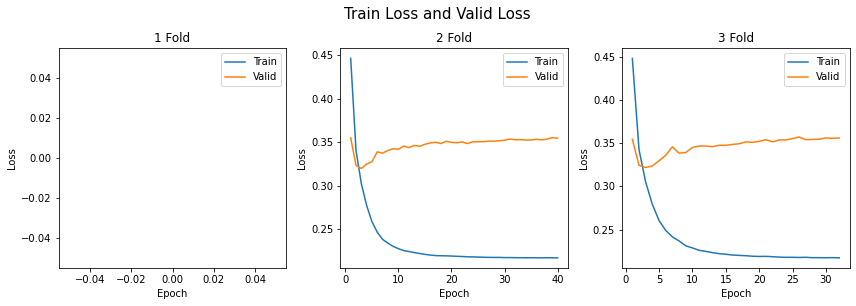

In [101]:
show_loss_plot(acd_fold_train_losses_per_epoch, acd_fold_valid_losses_per_epoch)

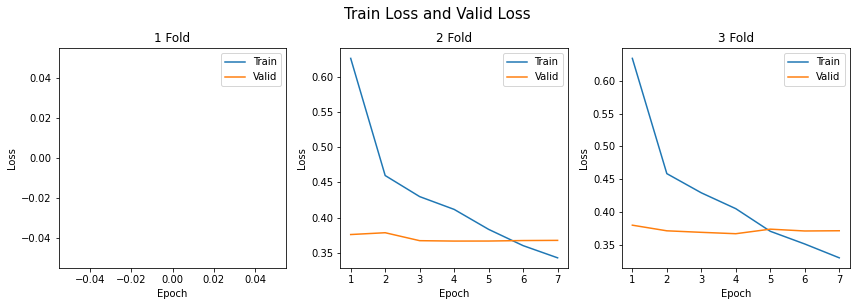

In [102]:
show_loss_plot(asc_fold_train_losses_per_epoch, asc_fold_valid_losses_per_epoch)

## Test ÏòàÏ∏°

In [103]:
def acd_predict(
        model: nn.Module, 
        dataloader: DataLoader, 
        weight_save_path: str, 
        device: torch.device,
        return_prob: bool = False
    ) -> Tensor:
    """test textÎ•º Î≥¥Í≥† Í∞úÏ≤¥ ÏÜçÏÑ±ÏùÑ Î∂ÑÎ•ò"""
    model.to(device) 
    weight_path_list = glob(weight_save_path + '/*.pt')
    test_probs = torch.zeros(len(dataloader.dataset), NUM_CLASSES['ACD'])  

    for weight_path in tqdm(weight_path_list):
        probs = None
        model.load_state_dict(torch.load(weight_path, map_location=device))
        model.eval()

        with torch.no_grad(): 
            for batch in dataloader:  ## test Îç∞Ïù¥ÌÑ∞Îäî ÎùºÎ≤®(y)Ïù¥ ÏóÜÎã§
                args = [*(map(lambda tensor: tensor.to(device), batch['ACD']))]
                y_hat = F.sigmoid(model(*args)[0]).detach().cpu().numpy()

                if probs is None:
                    probs = y_hat
                else:
                    probs = np.concatenate([probs, y_hat]) 

        test_probs += (torch.from_numpy(probs) / NUM_FOLDS)    ## Í∞Å Ïª¨ÎüºÎ≥Ñ ÌôïÎ•†
    test_probs = torch.from_numpy(np.apply_along_axis(under_half_max_to_1, 1, test_probs))  ## ÌÖçÏä§Ìä∏ÏóêÎäî Ï†ÅÏñ¥ÎèÑ Ìïú Í∞úÏùò Í∞úÏ≤¥ ÏÜçÏÑ±Ïù¥ Ìè¨Ìï®ÎêòÏñ¥Ïïº ÌïúÎã§
    test_preds = torch.where(test_probs >= 0.5, 1, 0)          ## threshold(0.5)Î≥¥Îã§ ÌÅ¨Î©¥ positive Í∑∏Î†áÏßÄ ÏïäÏúºÎ©¥ negative

    if return_prob:
        return test_probs  ## Í∞Å Ïª¨ÎüºÎ≥Ñ ÌôïÎ•†
    return test_preds  ## ÎùºÎ≤®

In [104]:
def asc_predict(
        model: nn.Module, 
        dataloader: DataLoader, 
        weight_save_path: str, 
        device: torch.device,
        return_prob: bool = False
    ) -> Tensor:
    """Í∞úÏ≤¥ ÏÜçÏÑ±ÏùÑ Î∂ÑÎ•òÌïú ÌõÑ Ï°¥Ïû¨ÌïòÎäî Í∞úÏ≤¥ ÏÜçÏÑ±Ïóê ÎåÄÌï¥ Í∞êÏÑ± Î∂ÑÎ•ò"""
    model = model.to(device) 
    weight_path_list = glob(weight_save_path + '/*.pt') 
    test_probs = torch.zeros(len(dataloader.dataset), NUM_CLASSES['ASC'])  

    for weight_path in tqdm(weight_path_list):
        probs = None
        model.load_state_dict(torch.load(weight_path, map_location=device))
        model.eval()

        with torch.no_grad(): 
            for batch in dataloader:  ## test Îç∞Ïù¥ÌÑ∞Îäî ÎùºÎ≤®(y)Ïù¥ ÏóÜÎã§
                args = [*(map(lambda tensor: tensor.to(device), batch['ASC']))]
                y_hat = model(*args)[0].detach().cpu().numpy()

                if probs is None:
                    probs = y_hat
                else:
                    probs = np.concatenate([probs, y_hat]) 

        test_probs += (torch.softmax(torch.from_numpy(probs), dim=-1) / NUM_FOLDS)  ## Í∞Å Ïª¨ÎüºÎ≥Ñ ÌôïÎ•†
    _, test_preds = torch.max(test_probs, dim=-1)  ## ÏµúÎåìÍ∞íÍ≥º Ïù∏Îç±Ïä§
    
    if return_prob:
        return test_probs  ## Í∞Å Ïª¨ÎüºÎ≥Ñ ÌôïÎ•†
    return test_preds  ## ÎùºÎ≤®

In [105]:
def fill_annotation(jsonl: List[JsonType], df: pd.DataFrame) -> List[JsonType]:
    """
    test jsonlÏùò annotationÏùÑ dfÏùò entity_propertyÏôÄ sentimentÎ°ú Ï±ÑÏö¥Îã§ (In-Place)
    For submission 
    """
    list_df = df.to_numpy().tolist()
    for idx, json in enumerate(jsonl):
        assert json['id'].split('-')[-1] == list_df[idx][0]  ## idÎäî ÎèôÏùºÌï¥Ïïº Ìï®
        jsonl[idx]['annotation'] = list(map(list, zip(list_df[idx][2], list_df[idx][3])))  ## entity_property, sentiment    
    return jsonl

In [106]:
test_acd_dataloader = DataLoader(ACDDataset(test, tokenizer, MAX_LEN), batch_size=BATCH_SIZE)

In [107]:
acd_preds = acd_predict(acd_model, test_acd_dataloader, SAVE_PATHS['ACD'], device=DEVICE)

  0%|          | 0/3 [00:00<?, ?it/s]

In [108]:
test['entity_property'] = list(map(list, ACD_ENCODER.inverse_transform(acd_preds)))
test = to_tidy(test)

In [109]:
# none_entity_test = test[test['entity_property'].apply(lambda x: False if x else True)]  ## sentiment == []
# test = test[test['entity_property'].apply(lambda x: True if x else False)].reset_index().drop('index', axis=1)

In [110]:
test_absa_dataloader = DataLoader(ABSADataset(test, tokenizer, MAX_LEN), batch_size=BATCH_SIZE)

In [111]:
asc_preds = asc_predict(asc_model, test_absa_dataloader, SAVE_PATHS['ASC'], device=DEVICE)
test['sentiment'] =  ASC_ENCODER.inverse_transform(asc_preds)

  0%|          | 0/3 [00:00<?, ?it/s]

In [112]:
# test = pd.concat([test, none_entity_test], axis=0)
# test = test.sort_values(by=['id']).reset_index().drop('index', axis=1)

In [113]:
test = to_untidy(test)

In [114]:
test_jsonl = fill_annotation(load_jsonl(test_path) , test)

In [115]:
write_jsonl(test_jsonl, submission_path)

In [116]:
x = to_tidy(test)
# x = x[x['entity_property'].apply(lambda x: True if x else False)].reset_index().drop('index', axis=1)

In [117]:
x.entity_property.value_counts() / x.shape[0]

Î≥∏Ìíà#ÌíàÏßà          0.341191
Ï†úÌíà Ï†ÑÏ≤¥#ÏùºÎ∞ò       0.156612
Î≥∏Ìíà#ÏùºÎ∞ò          0.094287
Î≥∏Ìíà#Ìé∏ÏùòÏÑ±         0.093088
Ï†úÌíà Ï†ÑÏ≤¥#ÎîîÏûêÏù∏      0.082701
Ï†úÌíà Ï†ÑÏ≤¥#ÌíàÏßà       0.069916
Ï†úÌíà Ï†ÑÏ≤¥#Ìé∏ÏùòÏÑ±      0.040751
Ï†úÌíà Ï†ÑÏ≤¥#Í∞ÄÍ≤©       0.029565
Ìå®ÌÇ§ÏßÄ/Íµ¨ÏÑ±Ìíà#ÎîîÏûêÏù∏    0.023971
Ìå®ÌÇ§ÏßÄ/Íµ¨ÏÑ±Ìíà#Ìé∏ÏùòÏÑ±    0.017179
Ìå®ÌÇ§ÏßÄ/Íµ¨ÏÑ±Ìíà#ÏùºÎ∞ò     0.015581
Ï†úÌíà Ï†ÑÏ≤¥#Ïù∏ÏßÄÎèÑ      0.012385
Î∏åÎûúÎìú#ÏùºÎ∞ò         0.007591
Î≥∏Ìíà#ÎîîÏûêÏù∏         0.005194
Î≥∏Ìíà#Îã§ÏñëÏÑ±         0.004794
Î∏åÎûúÎìú#Ïù∏ÏßÄÎèÑ        0.002397
Î∏åÎûúÎìú#ÌíàÏßà         0.001598
Ìå®ÌÇ§ÏßÄ/Íµ¨ÏÑ±Ìíà#ÌíàÏßà     0.001199
Name: entity_property, dtype: float64

In [ ]:
tidy_valid.entity_property.value_counts() / tidy_valid.shape[0]

Î≥∏Ìíà#ÌíàÏßà          0.375957
Ï†úÌíà Ï†ÑÏ≤¥#ÏùºÎ∞ò       0.257409
Ï†úÌíà Ï†ÑÏ≤¥#ÌíàÏßà       0.080919
Î≥∏Ìíà#ÏùºÎ∞ò          0.076923
Ï†úÌíà Ï†ÑÏ≤¥#ÎîîÏûêÏù∏      0.041958
Î≥∏Ìíà#Ìé∏ÏùòÏÑ±         0.031302
Ï†úÌíà Ï†ÑÏ≤¥#Ìé∏ÏùòÏÑ±      0.028638
Ï†úÌíà Ï†ÑÏ≤¥#Ïù∏ÏßÄÎèÑ      0.024975
Ìå®ÌÇ§ÏßÄ/Íµ¨ÏÑ±Ìíà#ÎîîÏûêÏù∏    0.020979
Î∏åÎûúÎìú#ÏùºÎ∞ò         0.016650
Ï†úÌíà Ï†ÑÏ≤¥#Í∞ÄÍ≤©       0.014319
Ìå®ÌÇ§ÏßÄ/Íµ¨ÏÑ±Ìíà#Ìé∏ÏùòÏÑ±    0.008991
Ìå®ÌÇ§ÏßÄ/Íµ¨ÏÑ±Ìíà#ÏùºÎ∞ò     0.006660
Î≥∏Ìíà#Îã§ÏñëÏÑ±         0.003330
Î∏åÎûúÎìú#Ïù∏ÏßÄÎèÑ        0.002664
Ìå®ÌÇ§ÏßÄ/Íµ¨ÏÑ±Ìíà#ÌíàÏßà     0.002331
Î≥∏Ìíà#ÎîîÏûêÏù∏         0.001998
Î∏åÎûúÎìú#ÌíàÏßà         0.001998
Î∏åÎûúÎìú#Í∞ÄÍ≤©         0.001332
Ìå®ÌÇ§ÏßÄ/Íµ¨ÏÑ±Ìíà#Îã§ÏñëÏÑ±    0.000666
Name: entity_property, dtype: float64

In [ ]:
tidy_df.entity_property.value_counts() / tidy_df.shape[0]

Î≥∏Ìíà#ÌíàÏßà          0.360963
Ï†úÌíà Ï†ÑÏ≤¥#ÏùºÎ∞ò       0.265249
Î≥∏Ìíà#ÏùºÎ∞ò          0.078198
Ï†úÌíà Ï†ÑÏ≤¥#ÌíàÏßà       0.074132
Ï†úÌíà Ï†ÑÏ≤¥#ÎîîÏûêÏù∏      0.049109
Ï†úÌíà Ï†ÑÏ≤¥#Ìé∏ÏùòÏÑ±      0.029403
Î≥∏Ìíà#Ìé∏ÏùòÏÑ±         0.029403
Ï†úÌíà Ï†ÑÏ≤¥#Ïù∏ÏßÄÎèÑ      0.020644
Î∏åÎûúÎìú#ÏùºÎ∞ò         0.016578
Ìå®ÌÇ§ÏßÄ/Íµ¨ÏÑ±Ìíà#ÎîîÏûêÏù∏    0.016578
Ï†úÌíà Ï†ÑÏ≤¥#Í∞ÄÍ≤©       0.015327
Ìå®ÌÇ§ÏßÄ/Íµ¨ÏÑ±Ìíà#Ìé∏ÏùòÏÑ±    0.011886
Ìå®ÌÇ§ÏßÄ/Íµ¨ÏÑ±Ìíà#ÏùºÎ∞ò     0.009384
Î≥∏Ìíà#Îã§ÏñëÏÑ±         0.006256
Î≥∏Ìíà#ÎîîÏûêÏù∏         0.004692
Î∏åÎûúÎìú#ÌíàÏßà         0.004066
Ìå®ÌÇ§ÏßÄ/Íµ¨ÏÑ±Ìíà#ÌíàÏßà     0.003128
Î∏åÎûúÎìú#Ïù∏ÏßÄÎèÑ        0.002815
Î∏åÎûúÎìú#Í∞ÄÍ≤©         0.000938
Î≥∏Ìíà#Í∞ÄÍ≤©          0.000626
Ìå®ÌÇ§ÏßÄ/Íµ¨ÏÑ±Ìíà#Îã§ÏñëÏÑ±    0.000313
Î≥∏Ìíà#Ïù∏ÏßÄÎèÑ         0.000313
Name: entity_property, dtype: float64